<div style="text-align: center; font-size: 25px;">
Trực quan hóa dữ liệu - CQ2021/21 <br>
Nhóm 02<br>
TLab 02: Working with Time-series data <br>
Chủ đề: Trực quan hóa khí hậu ở Indonesia
</div>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

# A. Thu thập dữ liệu

* Ngữ cảnh:
    * Indonesia là một quốc gia nhiệt đới với khí hậu đa dạng và phức tạp, ảnh hưởng lớn đến nông nghiệp, công nghiệp và đời sống của người dân. Phân tích dữ liệu khí hậu hàng ngày trong giai đoạn 2010-2020 sẽ cung cấp cái nhìn sâu sắc về các xu hướng thời tiết và khí hậu tại quốc gia này, từ đó giúp đưa ra những quyết định hợp lý trong nhiều lĩnh vực.

* Bộ dữ liệu:
    * Chủ đề: Dữ liệu khí hậu hàng ngày của Indonesia từ 2010 đến 2020.
    * Nguồn: https://www.kaggle.com/datasets/greegtitan/indonesia-climate/data

* License:
    * Bản quyền thuộc về tác giả gốc (BMKG (Cơ quan Khí tượng, Khí hậu và Địa vật lý Indonesia)), cho phép sao chép, chỉnh sửa và phân loại dữ liệu.

* Cách thức thu thập dữ liệu:
    * Nguồn thu thập: hoàn toàn phụ thuộc vào dữ liệu của BMKG (Cơ quan Khí tượng, Khí hậu và Địa vật lý Indonesia), theo đường dẫn: https://dataonline.bmkg.go.id/data_gempa_bumi


# B. Khám phá dữ liệu

In [28]:
df_climate = pd.read_csv('climate_data.csv')
df_province = pd.read_csv('province_detail.csv')
df_station = pd.read_csv('station_detail.csv')

- Mô tả các cột dữ liệu của climate_data:
    - **date**: Ngày tháng năm cụ thể.
    - **Tn**: Nhiệt độ tối thiểu trong ngày (°C).
    - **Tx**: Nhiệt độ tối đa trong ngày (°C).
    - **Tavg**: Nhiệt độ trung bình trong ngày (°C).
    - **RH_avg**: Độ ẩm trung bình trong ngày (%).
    - **RR**: Lượng mưa trong ngày (mm).
    - **ss**: Thời lượng nắng trong ngày (giờ).
    - **ff_x**: Tốc độ gió lớn nhất trong ngày (m/s).
    - **ddd_x**: Hướng gió tại tốc độ lớn nhất (°).
    - **ff_avg**: Tốc độ gió trung bình trong ngày (m/s).
    - **ddd_car**: Hướng gió chủ đạo trong ngày (°).
    - **station_id**: ID của trạm đo.

- Mô tả các cột dữ liệu của station_detail:
    - **station_id**: ID của trạm đo.
    - **station_name**: Tên của trạm đo.
    - **region_name**: Tên vùng mà trạm đo đặt tại.
    - **latitude**: Vĩ độ của trạm đo.
    - **longitude**: Kinh độ của trạm đo.
    - **region_id**: ID của vùng.
    - **province_id**: ID của tỉnh.

- Mô tả các cột dữ liệu của province_detail:
    - **province_id**: ID của tỉnh.
    - **province_name**: Tên của tỉnh.

- Từ việc phân tích các cột dữ liệu của các bảng trên, ta sẽ gộp các bảng dữ liệu với nhau:
    - Gộp `station_detail` với `province_detail` bằng `province_id`
    - Gộp `climate_data` với `station_detail` bằng `station_id`

In [29]:
# merge 3 csv
df_merg = df_station.merge(df_province, on=["province_id"], how='left')
df_merg_last = df_climate.merge(df_merg, on=["station_id"], how='left')
df = df_merg_last.copy()
df.head()

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,latitude,longitude,region_id,province_id,province_name
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1,Nanggroe Aceh Darussalam


In [30]:
print('Số hàng: ', df.shape[0])
print('Số cột: ', df.shape[1])

Số hàng:  589265
Số cột:  19


- Bộ dữ liệu có tổng cộng 589265 dòng, mỗi dòng đều có đúng 1 ý nghĩa, đó là thể hiện dữ liệu thời tiết liên quan đến 1 ngày xác định

- Bộ dữ liệu có 19 cột:
    - Mô tả các cột dữ liệu khí hậu:
        - **date**: Ngày tháng năm cụ thể.
        - **Tn**: Nhiệt độ tối thiểu trong ngày (°C).
        - **Tx**: Nhiệt độ tối đa trong ngày (°C).
        - **Tavg**: Nhiệt độ trung bình trong ngày (°C).
        - **RH_avg**: Độ ẩm trung bình trong ngày (%).
        - **RR**: Lượng mưa trong ngày (mm).
        - **ss**: Thời lượng nắng trong ngày (giờ).
        - **ff_x**: Tốc độ gió lớn nhất trong ngày (m/s).
        - **ddd_x**: Hướng gió tại tốc độ lớn nhất (°).
        - **ff_avg**: Tốc độ gió trung bình trong ngày (m/s).
        - **ddd_car**: Hướng gió chủ đạo trong ngày (°).

    - Mô tả các cột dữ liệu về trạm đo:
        - **station_id**: ID của trạm đo.
        - **station_name**: Tên của trạm đo.
        - **region_name**: Tên vùng mà trạm đo đặt tại.
        - **latitude**: Vĩ độ của trạm đo.
        - **longitude**: Kinh độ của trạm đo.
        - **region_id**: ID của vùng.

    - Mô tả các cột dữ liệu về tỉnh:
        - **province_id**: ID của tỉnh.
        - **province_name**: Tên của tỉnh.

- Sau đây ta sẽ đi xem qua kiểu dữ liệu của từng cột:

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589265 entries, 0 to 589264
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           589265 non-null  object 
 1   Tn             565882 non-null  float64
 2   Tx             551529 non-null  float64
 3   Tavg           544160 non-null  float64
 4   RH_avg         541083 non-null  float64
 5   RR             463881 non-null  float64
 6   ss             545544 non-null  float64
 7   ff_x           579051 non-null  float64
 8   ddd_x          576137 non-null  float64
 9   ff_avg         579138 non-null  float64
 10  ddd_car        575526 non-null  object 
 11  station_id     589265 non-null  int64  
 12  station_name   589265 non-null  object 
 13  region_name    589265 non-null  object 
 14  latitude       589265 non-null  float64
 15  longitude      589265 non-null  float64
 16  region_id      589265 non-null  int64  
 17  province_id    589265 non-nul

- Ta cần chuyển cột dữ liệu `date` có thuộc tính object thành datetime, dồng thời tách thêm cột `date` thành 3 cột `year`, `month`, `day`

In [32]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

- Sau khi đã chuyển xong, ta sẽ kiểm tra tỉ lệ thiếu giá trị của các cột

In [33]:
def missing_ratio(s):
    return (s.isnull().sum()/s.shape[0]).round(1)

df_missing_info = df.agg([missing_ratio])
df_missing_info

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,...,station_name,region_name,latitude,longitude,region_id,province_id,province_name,year,month,day
missing_ratio,0.0,0.0,0.1,0.1,0.1,0.2,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Ta thấy tỉ lệ thiếu giá trị của các cột khá nhỏ, nên ta có thể sử dụng nội suy (interpolation) để xử lý các giá trị thiếu này

In [34]:
df['Tx'] = df['Tx'].interpolate()
df['Tavg'] = df['Tavg'].interpolate()
df['RH_avg'] = df['RH_avg'].interpolate()
df['RR'] = df['RR'].interpolate()
df['ss'] = df['ss'].interpolate()

df_missing_info = df.agg([missing_ratio])
df_missing_info

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,...,station_name,region_name,latitude,longitude,region_id,province_id,province_name,year,month,day
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Sau khi đã kiểm tra xong việc thiếu dữ liệu, ta sẽ kiểm tra tiếp xem dữ liệu có ngoại lệ (outlier) hay không.

In [35]:
print(df.describe())

                                date             Tn             Tx  \
count                         589265  565882.000000  589265.000000   
mean   2015-08-09 23:46:38.410222592      23.312111      31.500447   
min              2010-01-01 00:00:00       0.000000       0.000000   
25%              2012-08-27 00:00:00      23.000000      30.500000   
50%              2015-10-23 00:00:00      24.000000      31.800000   
75%              2018-06-09 00:00:00      25.000000      32.900000   
max              2020-12-31 00:00:00     246.000000     334.000000   
std                              NaN       2.280687       2.405277   

                Tavg         RH_avg             RR             ss  \
count  589265.000000  589265.000000  589265.000000  589265.000000   
mean       26.821990      82.596287       8.640484       5.040292   
min         0.000000      24.000000      -1.000000       0.000000   
25%        26.200000      79.000000       0.000000       2.500000   
50%        27.127886    

- Ở đây sẽ sử dụng boxplot để trực quan dễ hơn

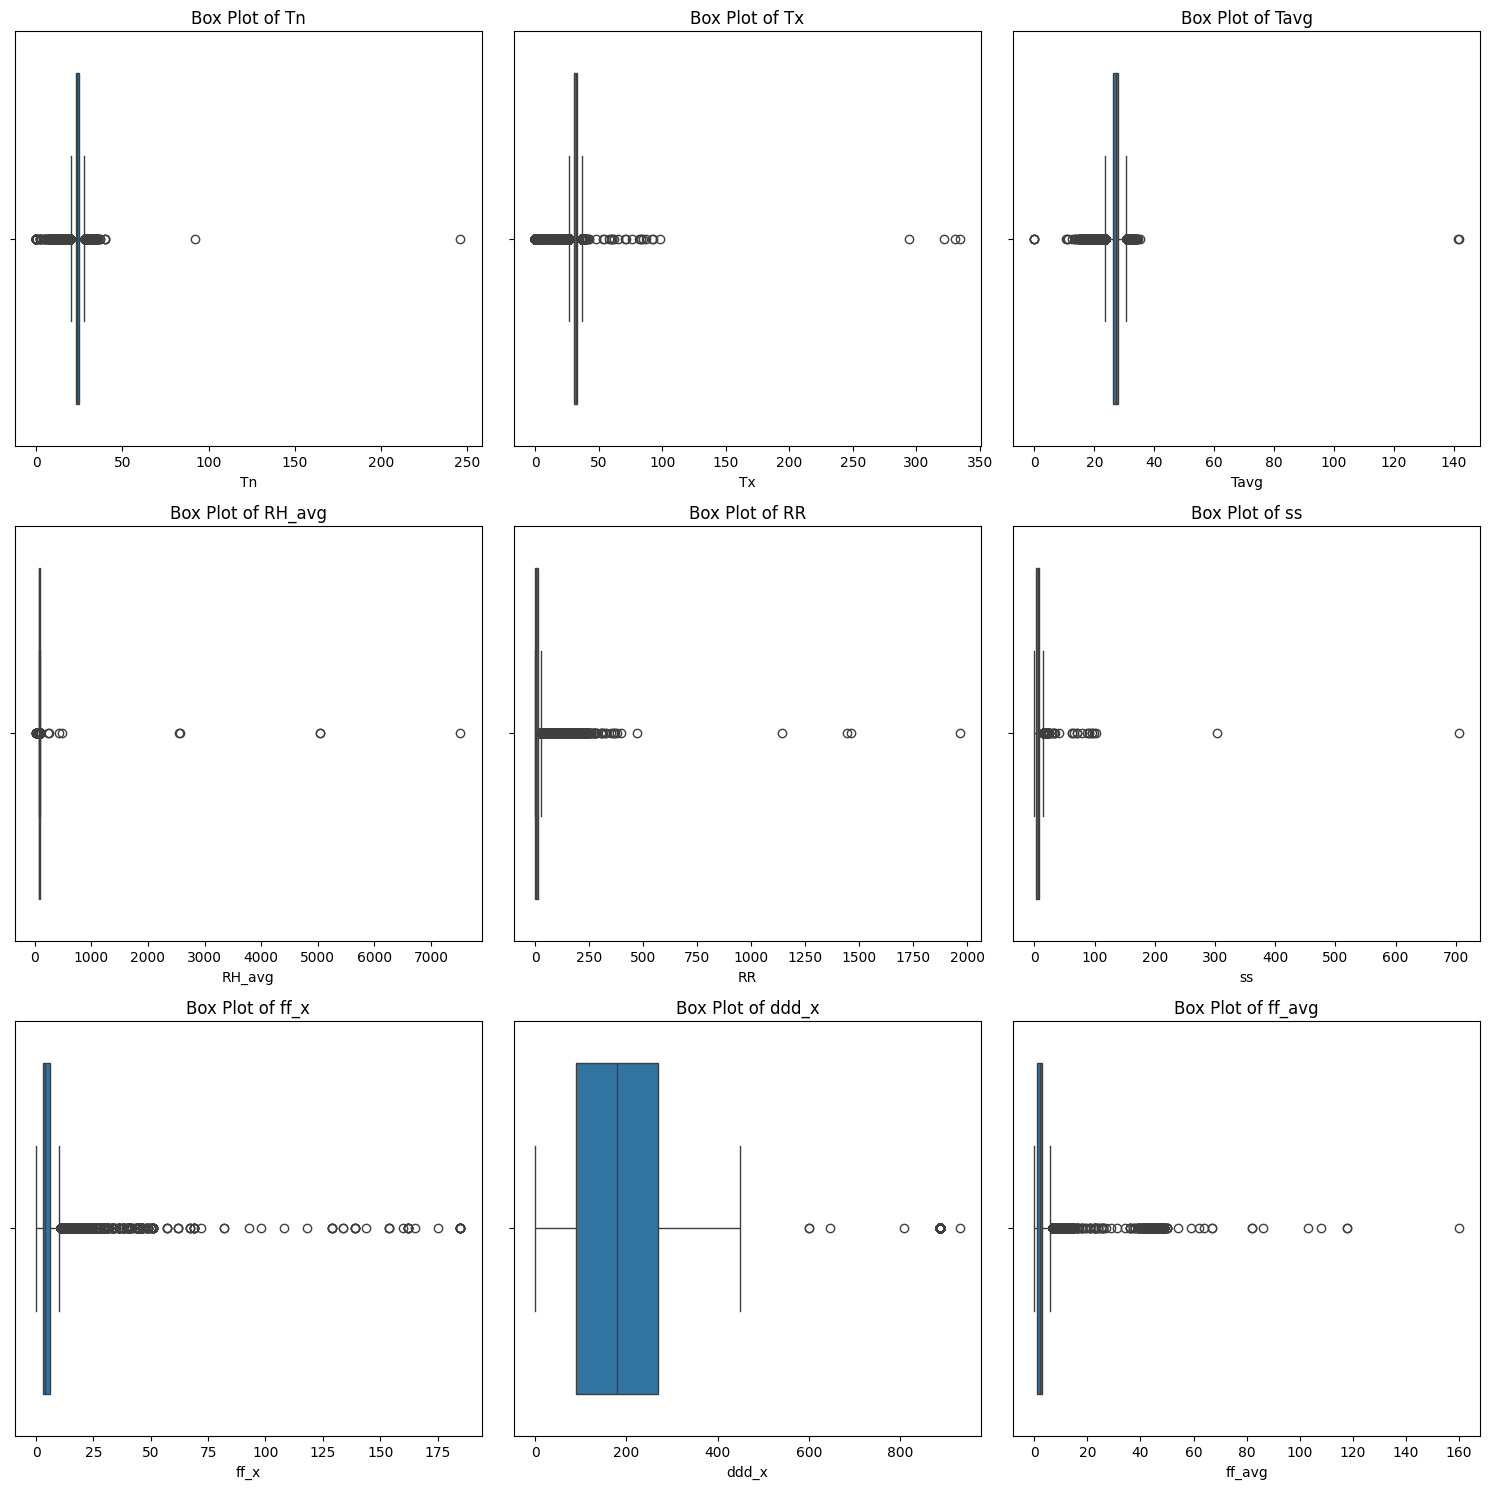

In [36]:
columns_to_plot = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']

# Tạo các subplots
num_cols = len(columns_to_plot)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Vẽ box plot cho từng cột
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Ẩn các axes trống
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Đối với các cột dữ liệu nhiệt độ, ta sẽ chỉ giữ lại các hàng có dữ liệu trong khoảng 0 đến 50 độ C
- Đồng trời bỏ các hàng có dữ liệu lỗi như nhiệt độ tối thiểu trong ngày (Tn) lớn hơn nhiệt độ tối đa trong ngày (Tx)

In [37]:
df = df[(df['Tn'] < 50) & (df['Tn'] > 0)]
df = df[(df['Tx'] < 50) & (df['Tx'] > 0)]
df = df[(df['Tavg'] < 50) & (df['Tavg'] > 0)]
df = df[(df['Tn'] <= df['Tx'])]

- Đối với cột có giá trị phần trăm như cột RH_avg, ta sẽ loại bỏ các giá trị vượt quá 100%
- Đối với cột RR, ta sẽ bỏ các giá trị ngoại lệ lớn hơn 1000
- Đối với cột ss (có đơn vị là giờ), ta sẽ bỏ các giá trị vượt quá 24 giờ trong 1 ngày
- Đối với cột ddd_x (có đơn vị là độ), ta sẽ chỉ xét từ 0 đến 360 độ, cho nên cũng bỏ các giá trị vượt quá phạm vi này

In [38]:
df = df[(df['RH_avg'] <= 100)]
df = df[(df['RR'] <= 1000)]
df = df[(df['ss'] <= 24)]
df = df[(df['ddd_x'] <= 360)]

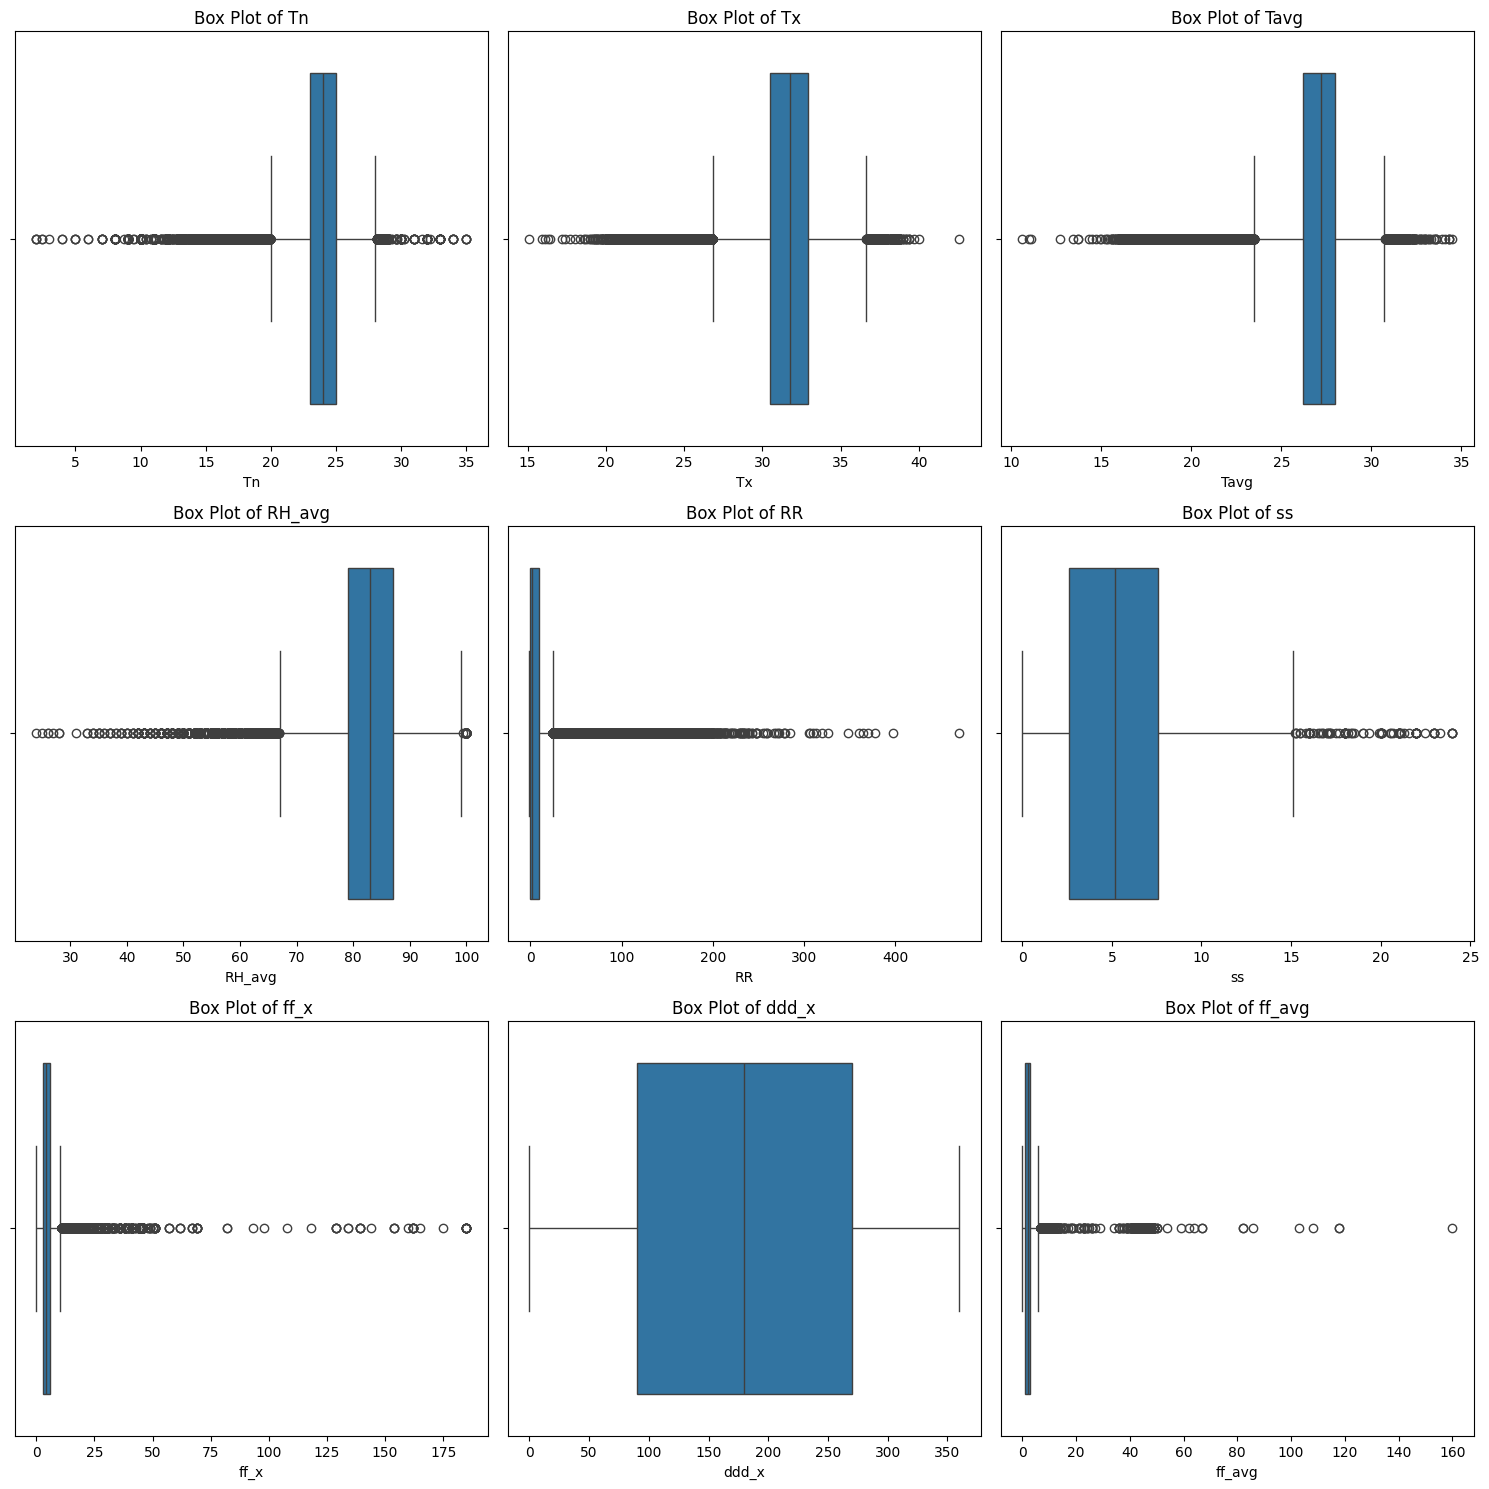

In [39]:
columns_to_plot = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']

# Tạo các subplots
num_cols = len(columns_to_plot)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Vẽ box plot cho từng cột
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Ẩn các axes trống
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

- Ta xem xét cột ss và loại bỏ những hàng có giá trị vượt quá 15 (vì nhận thấy các giá trị này khá vô lý)
- Cuối cùng ta sẽ xem xét và bỏ những giá trị vượt quá 75 (m/s) của tốc độ gió, cụ thể trên cột ff_x và cột ff_avg

In [40]:
df = df[(df['ss'] <= 15)]
df = df[(df['ff_x'] <= 75)]
df = df[(df['ff_avg'] <= 75)]

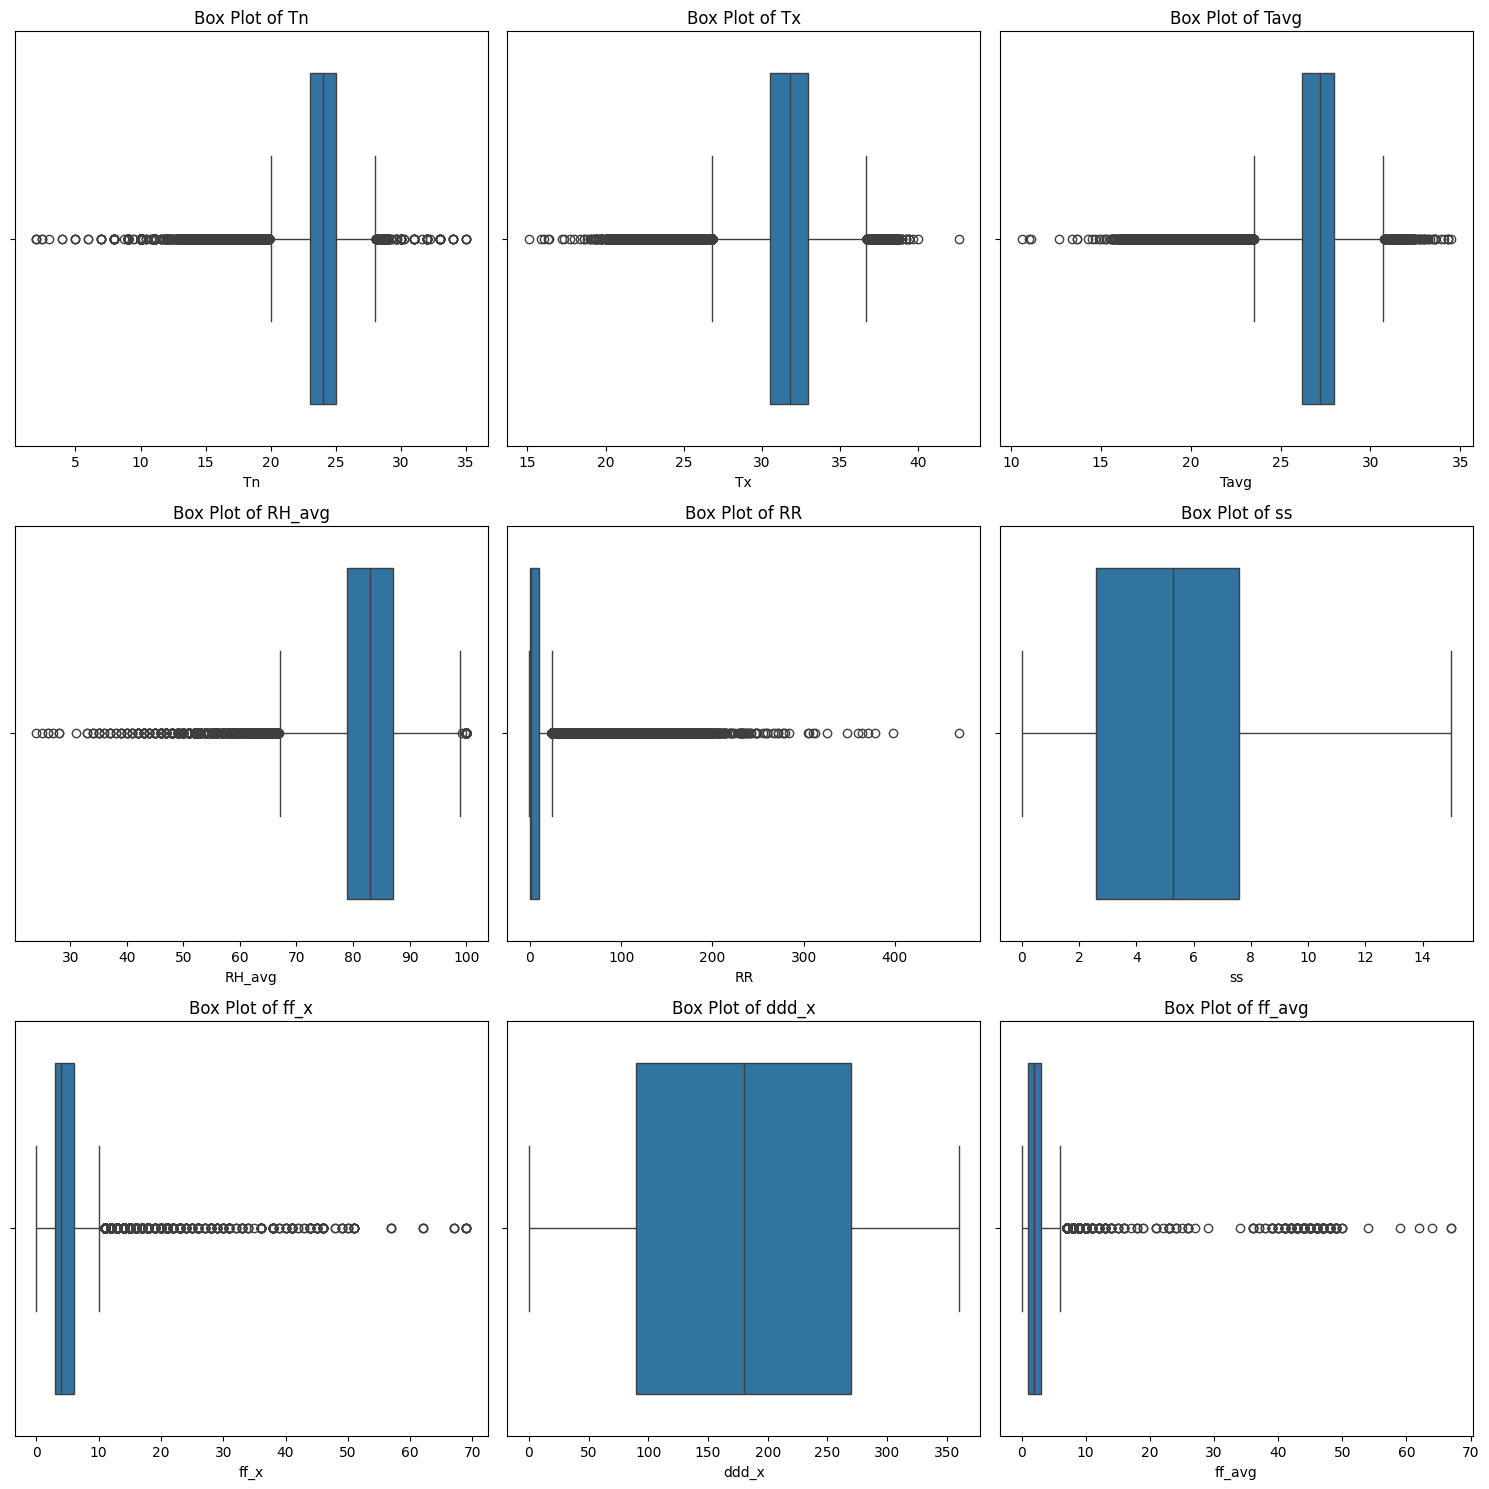

In [41]:
columns_to_plot = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x', 'ff_avg']

# Tạo các subplots
num_cols = len(columns_to_plot)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.flatten()

# Vẽ box plot cho từng cột
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Ẩn các axes trống
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [42]:
df.shape

(548576, 22)

In [43]:
df.to_csv('climate.csv', index=False)

# C. Khám phá mối quan hệ trong dữ liệu

### Nhận xét về Nhiệt độ (Temperature) trong bộ dữ liệu

#### Line plot

#### Lý do chọn biểu đồ: 
* Biểu đồ giúp ta có thể tìm ra các tỉnh có nhiệt độ trung bình và xu hướng nhiệt độ đặc biệt khác so với phần đông các tỉnh còn lại. Ta cũng có thể thấy được xu hướng thay đổi nhiệt độ theo thời gian của từng tỉnh bằng cách chọn tên tỉnh, biểu đồ của tỉnh đó sẽ hiện ra, đồng thời có thể chọn thêm các tỉnh khác để so sánh nhiệt độ qua từng năm. Biểu đồ được biểu diễn theo năm để dễ dàng hơn cho người xem. Ban đầu nên chọn "Ẩn tất cả" để dễ quan sát.

#### Lý do chọn màu: 
* Giúp người đọc dễ phân biệt đường nhiệt độ của các tỉnh hơn

#### Kỹ thuật áp dụng:
* Hover data: Khi người dùng di chuột qua một điểm dữ liệu, một tooltip sẽ xuất hiện hiển thị tất cả giá trị ở điểm dữ liệu đó.
* Zoom và cuộn: Người dùng có thể sử dụng công cụ zoom và cuộn để phóng to hoặc thu nhỏ các phần cụ thể của biểu đồ.
* Selection: người dùng có thể nhấp vào từng province_name ở list bên phải để ẩn hoặc hiện đường nhiệt độ của tỉnh đó trên biểu đồ. Có thể ẩn hoặc hiện tất cả tỉnh bằng nút bên trái

In [44]:
df_temp_year = df.groupby(['year','province_name'],as_index=False)['Tavg'].mean()
fig = px.line(df_temp_year, x='year', y='Tavg', 
              labels={'year': 'Năm', 'province_name': 'Tỉnh', 'Tavg': 'Nhiệt độ trung bình (°C)'}, 
              color="province_name")
fig.update_layout(
    title='Nhiệt độ trung bình hàng năm của các tỉnh ở Indonesia',
    updatemenus=[
        {
            'buttons': [
                {
                    'args': [{'visible': True}],
                    'label': 'Hiển thị tất cả',
                    'method': 'update'
                },
                {
                    'args': [{'visible': 'legendonly'}],
                    'label': 'Ẩn tất cả',
                    'method': 'update'
                }
            ],
            'direction': 'down',
            'showactive': True,
        }
    ]
)

fig.show()

#### Nhận xét:
* Xu hướng nhiệt độ của các tỉnh chia ra nhiều nhóm thể hiện các khu vực có sự tương đồng về điều kiện khí hậu.
* Nhiệt độ của Indonesia có xu hướng tăng dần qua các năm.
* Tỉnh Jawa Barat có nhiệt độ thấp hơn khá rõ ràng so với các tỉnh còn lại.

#### Đánh giá sự phù hợp:
* Biểu đồ đường giúp bạn dễ dàng quan sát sự thay đổi của nhiệt độ trung bình (Tavg) theo từng năm (year) của các tỉnh (province_name) khác nhau.
* Vạch kẻ theo màu (hue) giúp phân biệt nhiệt độ trung bình của từng tỉnh theo năm.
* Tuy nhiên, số lượng tỉnh quá nhiều, biểu đồ đường trở nên rối mắt hơn so với các biểu đồ khác như biểu đồ vùng (area plot)

#### Heatmap

#### Lý do chọn biểu đồ: 
* Heatmap cho phép biểu diễn một lượng lớn dữ liệu trên một diện tích hạn chế. 
* Màu sắc trong Heatmap giúp người dùng dễ dàng so sánh các giá trị nhiệt độ giữa các tháng hoặc năm, cũng như nhận diện xu hướng, mẫu hình hoặc bất thường trong dữ liệu. 
* Các giá trị nhiệt độ cao và thấp sẽ được thể hiện bằng các màu sắc đặc trưng, giúp người dùng nhanh chóng nhận ra sự khác biệt.

#### Lý do chọn màu sắc: 
* Màu coolwarm cung cấp sự tương phản cao giữa các mức nhiệt độ khác nhau, giúp dễ dàng nhận biết các khu vực nóng và lạnh trên biểu đồ.
* Các sắc thái xanh lam và đỏ biểu diễn các giá trị thấp và cao, dễ phân biệt cho người bị mù màu.
* Việc sử dụng dải màu liên tục từ xanh lam đến đỏ giúp tạo ra hiệu ứng chuyển màu mượt mà, giúp người xem dễ dàng theo dõi sự thay đổi nhiệt độ theo thời gian.
* Màu coolwarm thu hút sự chú ý của người xem đến các vùng cực đoan, nơi có sự biến động nhiệt độ lớn nhất.
* Việc sử dụng màu sắc tươi sáng và rực rỡ có thể giúp thu hút sự chú ý của người xem và khiến họ quan tâm nhiều hơn đến dữ liệu được hiển thị.

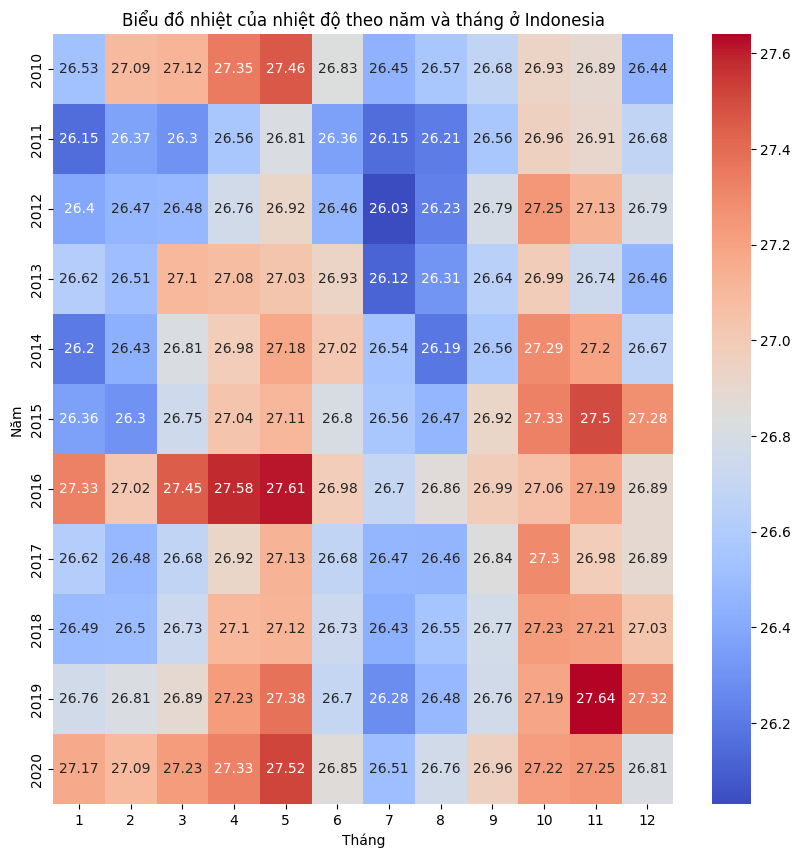

In [45]:
df_temp_month = df.groupby(['year', 'month'],as_index=False)['Tavg'].mean()
matrix = df_temp_month.pivot(index='year', columns='month', values='Tavg').round(2)
fig = plt.figure(figsize=(10, 10))
sns.heatmap(matrix, annot=True, fmt='', cmap='coolwarm', cbar=True)
plt.title('Biểu đồ nhiệt của nhiệt độ theo năm và tháng ở Indonesia')
plt.xlabel('Tháng')
plt.ylabel('Năm')
plt.show()

#### Sau khi sử dụng màu sắc, ta rút ra được nhận xét:

* Chu kỳ
    * Tháng 1-2, 7-8: nhiệt độ mát nhất năm
    * Tháng 3-6, 9-12: nhiệt độ cao nhất năm
* Nhiệt độ ngày càng cao hơn qua các năm.
* Xuất hiện một số tháng có nhiệt độ cao bất thường.
* Năm 2016 nóng hơn hầu hết các năm được ghi nhận trong data.
* Năm 2011 là năm duy nhất có mức nhiệt không chạm đến ngưỡng 27 độ.
* Tháng 7 là tháng duy nhất có mức nhiệt không chạm đến ngưỡng 27 độ.


#### Đánh giá sự phù hợp:
* Sử dụng heatmap trong trường hợp này là phù hợp nhất để tổng quan về sự phân bố nhiệt độ theo tháng qua các năm, vì nó cung cấp cho ta lượng thông tin lớn nhất.
* Màu sắc thể hiện sự khác biệt của giá trị trung bình nhiệt độ, giúp người xem nhanh chóng nhận ra tháng nào nóng nhất và tháng nào lạnh nhất trong năm.
* Tuy nhiên, khả năng so sánh chi tiết giữa các giá trị nhiệt độ theo từng tháng trong những năm khác nhau trên heatmap có thể khó khăn hơn so với các biểu đồ khác như đường (line) hoặc cột (bar).

### Nhận xét về Độ ẩm (Humid) trong bộ dữ liệu

In [46]:
# Nhóm dữ liệu theo 'year' và 'province_name', sau đó tính trung bình độ ẩm (RH_avg)
df_avg_humidity = df.groupby(['year', 'province_name'])['RH_avg'].mean().reset_index()

# Vẽ biểu đồ tương tác
fig = px.line(df_avg_humidity, x='year', y='RH_avg', color='province_name',
              title='Độ ẩm trung bình theo năm của các tỉnh ở Indonesia',
              labels={'year': 'Năm', 'RH_avg': 'Độ ẩm trung bình (%)', 'province_name': 'Tên tỉnh'},
              markers=True)

fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {
                    'args': [{'visible': True}],
                    'label': 'Hiển thị tất cả',
                    'method': 'update'
                },
                {
                    'args': [{'visible': 'legendonly'}],
                    'label': 'Ẩn tất cả',
                    'method': 'update'
                }
            ],
            'direction': 'down',
            'showactive': True,
        }
    ]
)

# Hiển thị biểu đồ
fig.show()

#### Line plot

#### Lý do chọn biểu đồ: 
* __Hiển thị xu hướng theo thời gian__: Biểu đồ đường là lựa chọn lý tưởng để hiển thị các biến đổi của dữ liệu theo thời gian. Nó giúp ta dễ dàng quan sát xu hướng và mẫu hình của dữ liệu qua các năm.
* __Phân biệt giữa các tỉnh__: Sử dụng biểu đồ đường giúp chúng ta có thể vẽ nhiều dòng khác nhau trên cùng một biểu đồ, mỗi dòng đại diện cho một tỉnh. Điều này giúp dễ dàng so sánh giữa các tỉnh.

#### Lý do chọn màu sắc trong Plotly: 
* __Tự động gán màu__: Plotly tự động chọn màu sắc khác nhau cho mỗi tỉnh, đảm bảo rằng mỗi dòng trên biểu đồ có màu sắc riêng biệt, giúp phân biệt dễ dàng giữa các tỉnh.
* __Đảm bảo tương phản__: Plotly chọn màu sắc đảm bảo đủ tương phản để các đường trên biểu đồ không bị nhầm lẫn. Màu sắc được chọn sao cho dễ phân biệt ngay cả khi có nhiều đường hiển thị cùng lúc.
* __Tính nhất quán__: Khi sử dụng cùng một mã màu cho từng tỉnh qua các lần hiển thị khác nhau, Plotly giúp giữ tính nhất quán, làm cho việc nhận diện và so sánh dữ liệu dễ dàng hơn.
* __Hiển thị rõ ràng__: Màu sắc được chọn trong Plotly đảm bảo rằng chúng hiển thị rõ ràng trên nền trắng của biểu đồ, giúp người dùng dễ dàng nhìn thấy và phân biệt các đường.

#### Nhận xét:
* Ở DKJ Jakarta (thủ đô của Indonesia) luôn duy trì độ ẩm trung bình thấp nhất qua từng năm; chỉ riêng năm 2011 và 2013, độ ẩm trung bình của tỉnh này thấp thứ hai.
* Chênh lệch giữa độ ẩm trung bình cao nhất và thấp nhất trong từng năm khá ổn định từ 2010 đến 2016, từ năm 2017 độ chênh lệch bắt đầu tăng, và giảm về như giai đoạn đầu vào năm 2020.

### Nhận xét về Lượng mưa (Rain) trong bộ dữ liệu

In [47]:
df_avg_rainfall = df.groupby('month')['RR'].mean().reset_index()

fig = px.line(df_avg_rainfall, x='month', y='RR',
              title='Lượng mưa trung bình theo tháng ở Indonesia',
              labels={'month': 'Tháng', 'RR': 'Lượng mưa trung bình (mm)'},
              markers=True)

# Hiển thị biểu đồ
fig.show()

#### Lý do chọn biểu đồ: 
* __Hiển thị xu hướng theo thời gian__: Biểu đồ đường rất hiệu quả trong việc hiển thị các xu hướng của dữ liệu theo thời gian. Trong trường hợp này, biểu đồ đường giúp dễ dàng nhận thấy sự thay đổi lượng mưa trung bình theo từng tháng trong năm.
* __Đơn giản và trực quan__: Biểu đồ đường là một cách trực quan và dễ hiểu để trình bày dữ liệu thời gian. Đường biểu diễn liên tục giúp người xem dễ dàng nhận ra các xu hướng và mẫu hình thời gian.
* __Phù hợp cho dữ liệu theo tháng__: Khi muốn so sánh lượng mưa trung bình theo tháng trong năm, biểu đồ đường là lựa chọn tốt để thể hiện sự biến đổi và xu hướng theo thời gian một cách mượt mà.

#### Lý do chọn màu sắc trong Plotly:
* __Tự động gán màu__: Plotly tự động chọn màu sắc cho biểu đồ. Đối với một biểu đồ đường đơn giản như này, Plotly sẽ chọn một màu đơn sắc để biểu diễn đường lượng mưa trung bình, giúp đường biểu diễn nổi bật trên nền trắng của biểu đồ.
* __Tối ưu hiển thị__: Màu sắc được chọn bởi Plotly đảm bảo đủ tương phản để biểu đồ dễ đọc và các đường hoặc điểm trên biểu đồ rõ ràng, ngay cả khi người dùng tương tác với biểu đồ.
* __Tính nhất quán__: Màu sắc tự động của Plotly giúp giữ tính nhất quán trong hiển thị, làm cho biểu đồ dễ theo dõi và chuyên nghiệp.
* __Tập trung vào dữ liệu__: Màu sắc đơn giản và trực quan giúp tập trung vào dữ liệu chính mà không bị phân tâm bởi các yếu tố màu sắc phức tạp.

#### Nhận xét:
* Lượng mưa trung bình có xu hướng giảm từ tháng 1 đến tháng 8, và tăng từ tháng 8 đến tháng 12 (đặc biệt tăng mạnh từ tháng 10 đến tháng 12)
* Lượng mưa trung bình cao nhất là vào tháng 12 và tháng 1 (xấp xỉ gần bằng nhau), thấp nhất vào tháng 8
* Từ các điều trên cho thấy phân bố mưa ở Indonesia khá giống ở Việt Nam

### Nhận xét về Tốc độ gió (Windspeed) trong bộ dữ liệu

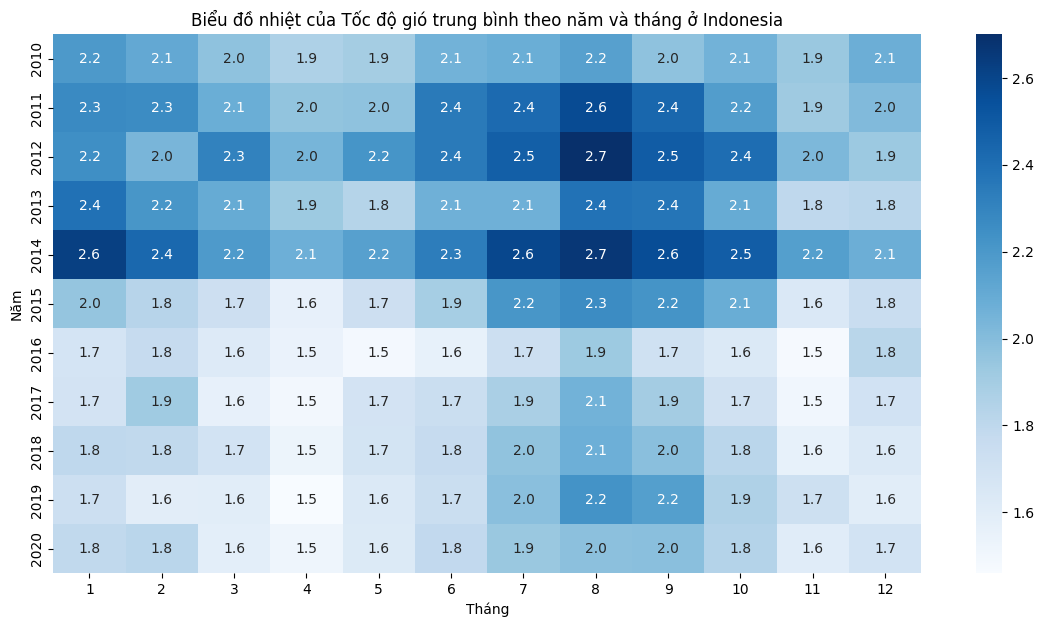

In [48]:
# Biểu đồ nhiệt của Tốc độ gió trung bình theo năm và tháng
pivot = df.pivot_table(index='year', columns='month', values='ff_avg', aggfunc='mean')
plt.figure(figsize=(14, 7))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='Blues')
plt.title('Biểu đồ nhiệt của Tốc độ gió trung bình theo năm và tháng ở Indonesia')
plt.xlabel('Tháng')
plt.ylabel('Năm')
plt.show()

#### Lý do chọn biểu đồ:

- **Biểu đồ nhiệt (Heatmap)**:
   - **Lý do chọn**: Biểu đồ nhiệt là lựa chọn lý tưởng để hiển thị dữ liệu trung bình theo cả hai chiều thời gian (năm và tháng). Nó giúp chúng ta dễ dàng nhận ra các xu hướng và mẫu trong dữ liệu một cách trực quan. Đặc biệt, khi dữ liệu có tính chất thời gian và chúng ta muốn so sánh các giá trị qua các năm và tháng, biểu đồ nhiệt cho phép nhìn thấy sự thay đổi và biến động một cách tổng thể và rõ ràng.

#### Lý do chọn màu sắc:

- **Bảng màu xanh dương (Blues)**:
   - **Lý do chọn**: Bảng màu xanh dương (Blues) thường được sử dụng để biểu thị dữ liệu liên quan đến khí tượng, chẳng hạn như tốc độ gió, vì nó dễ liên tưởng đến không khí và bầu trời. Màu xanh nhạt biểu thị giá trị thấp, trong khi màu xanh đậm biểu thị giá trị cao, giúp dễ dàng phân biệt mức độ của tốc độ gió trung bình theo thời gian. Sử dụng bảng màu đơn sắc giúp tránh sự phân tán màu sắc không cần thiết và tập trung vào sự biến đổi của dữ liệu.

#### Nhận xét về đồ thị:

- **Nhận xét tổng quan**:
   - Biểu đồ nhiệt cho thấy sự biến động của tốc độ gió trung bình (ff_avg) qua các năm và tháng.
   - Ta có thể nhận thấy rằng tốc độ gió trung bình có xu hướng giảm dần từ năm 2010 đến năm 2020.
   - Những tháng có tốc độ gió cao hơn thường nằm trong khoảng từ tháng 3 đến tháng 7, đặc biệt là tháng 6 và tháng 7 trong các năm 2012 và 2014 có giá trị cao nhất.

- **Nhận xét chi tiết**:
   - **Năm 2010 - 2014**: Tốc độ gió trung bình khá ổn định và tương đối cao hơn so với các năm sau. Đặc biệt, năm 2014 có một số tháng (như tháng 6) có tốc độ gió trung bình cao nhất (2.7 m/s).
   - **Năm 2015 - 2020**: Tốc độ gió trung bình có xu hướng giảm rõ rệt. Các tháng trong khoảng thời gian này thường có tốc độ gió trung bình dưới 2.0 m/s.
   - **Tháng 6 - Tháng 7**: Thường có tốc độ gió trung bình cao hơn so với các tháng khác, có thể liên quan đến sự thay đổi thời tiết và mùa bão.

Biểu đồ nhiệt cung cấp một cái nhìn sâu sắc về sự biến động của tốc độ gió trung bình tại Indonesia qua các năm và tháng. Xu hướng giảm tốc độ gió và sự biến động theo mùa có thể phản ánh những thay đổi trong hệ thống thời tiết và khí hậu của quốc gia này.

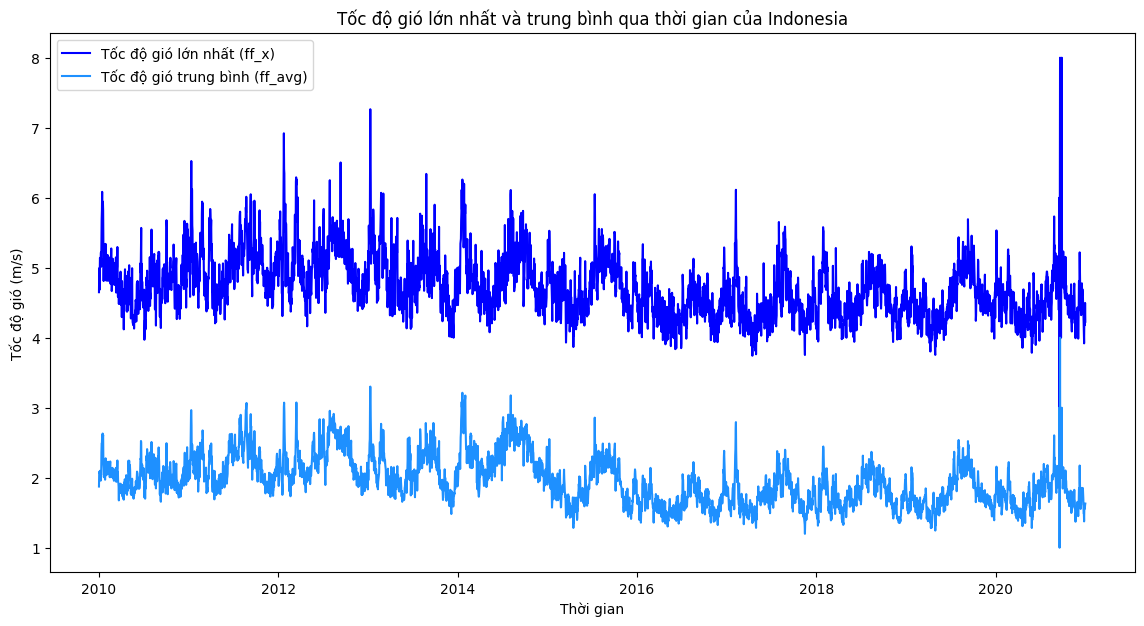

In [49]:
# Biểu đồ line thời gian của tốc độ gió lớn nhất và trung bình
df_windspeed_daily = df.groupby('date').agg({'ff_x': 'mean', 'ff_avg': 'mean', 'RR': 'mean'}).reset_index()
plt.figure(figsize=(14, 7))
plt.plot(df_windspeed_daily['date'], df_windspeed_daily['ff_x'], label='Tốc độ gió lớn nhất (ff_x)', color='blue')
plt.plot(df_windspeed_daily['date'], df_windspeed_daily['ff_avg'], label='Tốc độ gió trung bình (ff_avg)', color='dodgerblue')
plt.title('Tốc độ gió lớn nhất và trung bình qua thời gian của Indonesia')
plt.xlabel('Thời gian')
plt.ylabel('Tốc độ gió (m/s)')
plt.legend()
plt.show()

### Lý do chọn biểu đồ:

- **Biểu đồ chuỗi thời gian (Time Series Plot)**:
   - **Lý do chọn**: Biểu đồ chuỗi thời gian là công cụ mạnh mẽ để hiển thị sự thay đổi của một hoặc nhiều biến số theo thời gian. Đối với dữ liệu khí tượng, biểu đồ này giúp chúng ta nhìn thấy sự biến động và xu hướng của tốc độ gió lớn nhất và tốc độ gió trung bình qua các năm. Biểu đồ này đặc biệt hữu ích để xác định các sự kiện thời tiết cực đoan và xu hướng dài hạn.

### Lý do chọn màu sắc:

- **Màu xanh dương (Blue)** và **Màu xanh dương nhạt (Dodger Blue)**:
   - **Màu xanh dương (Blue)**: Được chọn cho tốc độ gió lớn nhất (ff_x) vì màu xanh dương thường liên quan đến các yếu tố thiên nhiên như gió và nước, tạo cảm giác mạnh mẽ và dễ nhận biết cho các giá trị cực đại.
   - **Màu xanh dương nhạt (Dodger Blue)**: Được chọn cho tốc độ gió trung bình (ff_avg) vì nó tạo ra sự khác biệt rõ ràng với màu xanh dương đậm, giúp phân biệt giữa hai đường biểu diễn một cách dễ dàng mà vẫn giữ được sự liên quan về chủ đề.

### Nhận xét về đồ thị:

- **Nhận xét tổng quan**:
   - Biểu đồ hiển thị hai đường biểu diễn: tốc độ gió lớn nhất (ff_x) và tốc độ gió trung bình (ff_avg) từ năm 2010 đến năm 2020.
   - Tốc độ gió lớn nhất thường cao hơn đáng kể so với tốc độ gió trung bình, điều này là bình thường do sự tồn tại của các cơn gió mạnh hoặc bão.

- **Nhận xét chi tiết**:
   - **Sự biến động**: 
     - Tốc độ gió lớn nhất (ff_x) có sự biến động mạnh hơn so với tốc độ gió trung bình (ff_avg). Điều này thể hiện qua các đỉnh nhọn và các khoảng cách lớn giữa các giá trị cao và thấp, đặc biệt rõ ràng trong các năm 2012, 2014 và 2020.
     - Tốc độ gió trung bình (ff_avg) cũng biến động nhưng ít hơn và có xu hướng ổn định hơn, với các dao động nhỏ hơn quanh giá trị trung bình.
   - **Xu hướng dài hạn**: 
     - Không có xu hướng giảm rõ rệt về tốc độ gió lớn nhất, nhưng có thể thấy một số giai đoạn có mức độ biến động lớn hơn (như năm 2020).
     - Tốc độ gió trung bình có xu hướng giảm nhẹ từ năm 2010 đến năm 2020, điều này phù hợp với các nhận xét từ biểu đồ nhiệt trước đó.
   - **Sự kiện cực đoan**: 
     - Các đỉnh nhọn trong tốc độ gió lớn nhất có thể tương ứng với các sự kiện thời tiết cực đoan như bão hoặc các cơn gió mạnh. Ví dụ, sự tăng đột biến vào năm 2020 có thể liên quan đến một sự kiện thời tiết đặc biệt.

### Đánh giá tình hình thời tiết của Indonesia dựa trên đồ thị:

- **Tình hình chung**:
   - Tốc độ gió lớn nhất và trung bình tại Indonesia có sự biến động lớn qua các năm. Sự biến động này có thể ảnh hưởng đến các hoạt động hàng ngày, hàng hải, hàng không và các ngành công nghiệp khác.

- **Xu hướng khí hậu**:
   - Xu hướng giảm nhẹ trong tốc độ gió trung bình có thể chỉ ra những thay đổi trong hệ thống khí hậu của Indonesia, có thể ảnh hưởng đến môi trường, nông nghiệp và đời sống của người dân.
   - Sự xuất hiện thường xuyên của các đỉnh nhọn trong tốc độ gió lớn nhất cho thấy khả năng xuất hiện của các hiện tượng thời tiết cực đoan, cần được theo dõi và dự báo để giảm thiểu thiệt hại.

### Nhận xét về mối tương quan giữa Tốc độ gió (Windspeed) và Lượng mưa (Rain) trong bộ dữ liệu

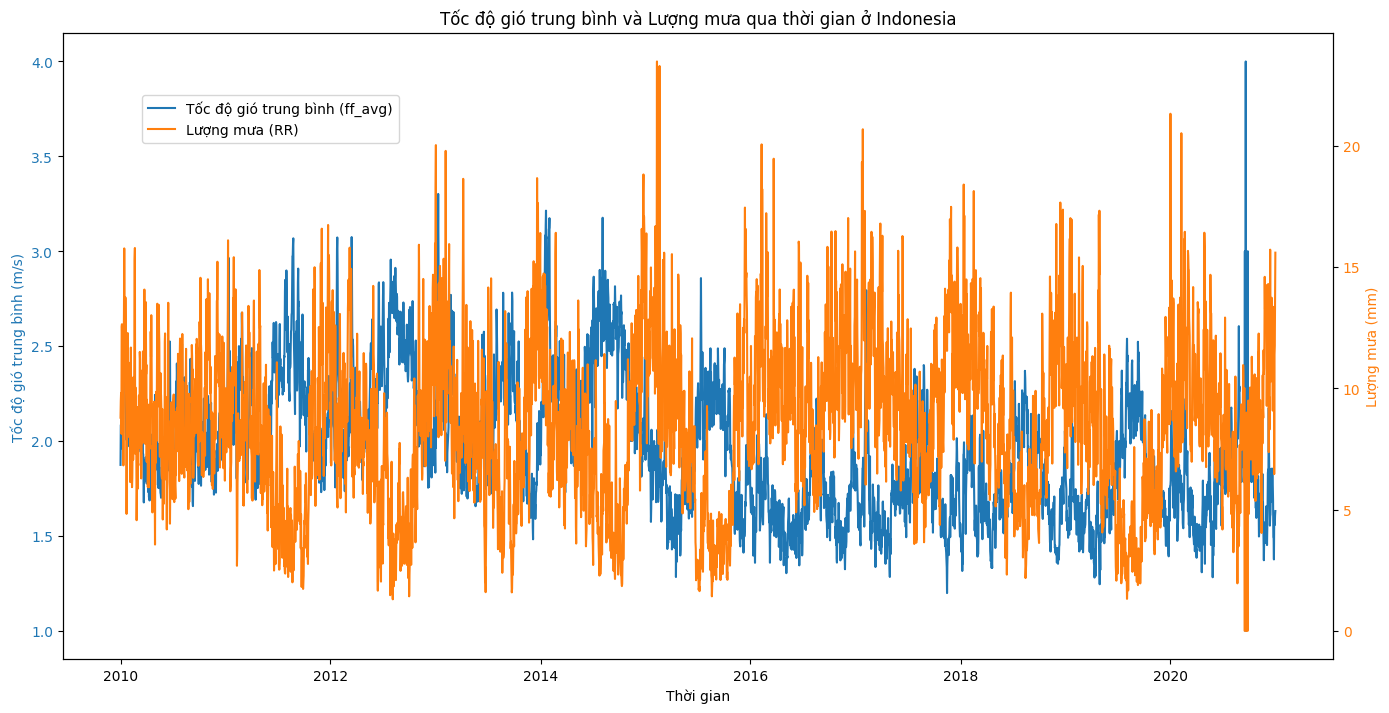

In [50]:
# Biểu đồ chuỗi thời gian của Tốc độ gió trung bình và Lượng mưa
fig, ax1 = plt.subplots(figsize=(14, 7))

# Trục y thứ nhất cho tốc độ gió trung bình
color = 'tab:blue'
ax1.set_xlabel('Thời gian')
ax1.set_ylabel('Tốc độ gió trung bình (m/s)', color=color)
ax1.plot(df_windspeed_daily['date'], df_windspeed_daily['ff_avg'], label='Tốc độ gió trung bình (ff_avg)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Trục y thứ hai cho lượng mưa
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Lượng mưa (mm)', color=color)
ax2.plot(df_windspeed_daily['date'], df_windspeed_daily['RR'], label='Lượng mưa (RR)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Thêm tiêu đề và hiển thị biểu đồ
fig.tight_layout()
plt.title('Tốc độ gió trung bình và Lượng mưa qua thời gian ở Indonesia')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()

### Lý do chọn biểu đồ:

- **Biểu đồ chuỗi thời gian với hai trục y (Dual Y-Axis Time Series Plot)**:
   - **Lý do chọn**: Biểu đồ chuỗi thời gian với hai trục y cho phép hiển thị đồng thời hai biến số có đơn vị đo lường khác nhau trên cùng một biểu đồ. Đây là cách tốt nhất để so sánh trực quan mối quan hệ giữa tốc độ gió trung bình (ff_avg) và lượng mưa (RR) theo thời gian. Biểu đồ này giúp xác định xem có sự tương quan nào giữa tốc độ gió và lượng mưa hay không.

### Lý do chọn màu sắc:

- **Màu xanh dương (Blue)** và **Màu cam (Orange)**:
   - **Màu xanh dương (Blue)**: Được sử dụng cho tốc độ gió trung bình (ff_avg) vì màu xanh dương thường liên quan đến gió và bầu trời, tạo cảm giác liên kết trực quan với yếu tố khí tượng này.
   - **Màu cam (Orange)**: Được sử dụng cho lượng mưa (RR) vì màu cam tạo sự tương phản tốt với màu xanh dương, giúp phân biệt rõ ràng giữa hai biến số. Màu cam cũng thường liên quan đến các yếu tố nhiệt đới và mưa, tạo cảm giác tự nhiên và dễ nhận biết.

### Nhận xét về đồ thị:

- **Nhận xét tổng quan**:
   - Biểu đồ hiển thị hai đường biểu diễn: tốc độ gió trung bình (ff_avg) và lượng mưa (RR) từ năm 2010 đến năm 2020.
   - Sử dụng hai trục y giúp so sánh trực quan giữa hai biến số có đơn vị đo lường khác nhau mà không làm mất đi tính chính xác của dữ liệu.

- **Nhận xét chi tiết**:
   - **Sự biến động**:
     - Tốc độ gió trung bình (ff_avg) biến động quanh giá trị trung bình từ 1.5 đến 3.5 m/s, với các đỉnh nhọn xuất hiện vào các thời điểm khác nhau trong suốt giai đoạn 2010-2020.
     - Lượng mưa (RR) có sự biến động lớn hơn, với các giá trị cao nhất lên đến 30 mm. Các đỉnh nhọn của lượng mưa thường xuất hiện vào các mùa mưa hàng năm.
   - **Xu hướng dài hạn**:
     - Tốc độ gió trung bình có xu hướng giảm nhẹ qua các năm, tương tự như nhận xét từ các biểu đồ trước đó.
     - Lượng mưa không cho thấy xu hướng giảm hay tăng rõ rệt, mà thay đổi theo mùa.
   - **Mối quan hệ giữa tốc độ gió và lượng mưa**:
     - Không có mối quan hệ rõ ràng giữa tốc độ gió trung bình và lượng mưa. Các đỉnh nhọn của lượng mưa không luôn trùng với các đỉnh nhọn của tốc độ gió trung bình. Điều này cho thấy rằng tốc độ gió trung bình và lượng mưa có thể không có sự liên quan trực tiếp hoặc có thể bị ảnh hưởng bởi các yếu tố khác.

### Đánh giá tình hình thời tiết của Indonesia dựa trên đồ thị:

- **Tình hình chung**:
   - Indonesia có sự biến động lớn về lượng mưa và tốc độ gió trung bình qua các năm, thể hiện rõ ràng qua biểu đồ chuỗi thời gian.
   - Sự xuất hiện thường xuyên của các đỉnh nhọn về lượng mưa cho thấy Indonesia phải đối mặt với các đợt mưa lớn theo mùa, đặc biệt trong mùa mưa.

- **Xu hướng khí hậu**:
   - Xu hướng giảm nhẹ trong tốc độ gió trung bình có thể ảnh hưởng đến môi trường, khí hậu, và các hoạt động kinh tế tại Indonesia.
   - Lượng mưa không có xu hướng rõ rệt nhưng sự biến động lớn theo mùa cho thấy tầm quan trọng của việc quản lý nguồn nước và phòng chống lũ lụt.

### Nhận xét về Thời gian chiếu sáng (Sunshine) trong bộ dữ liệu

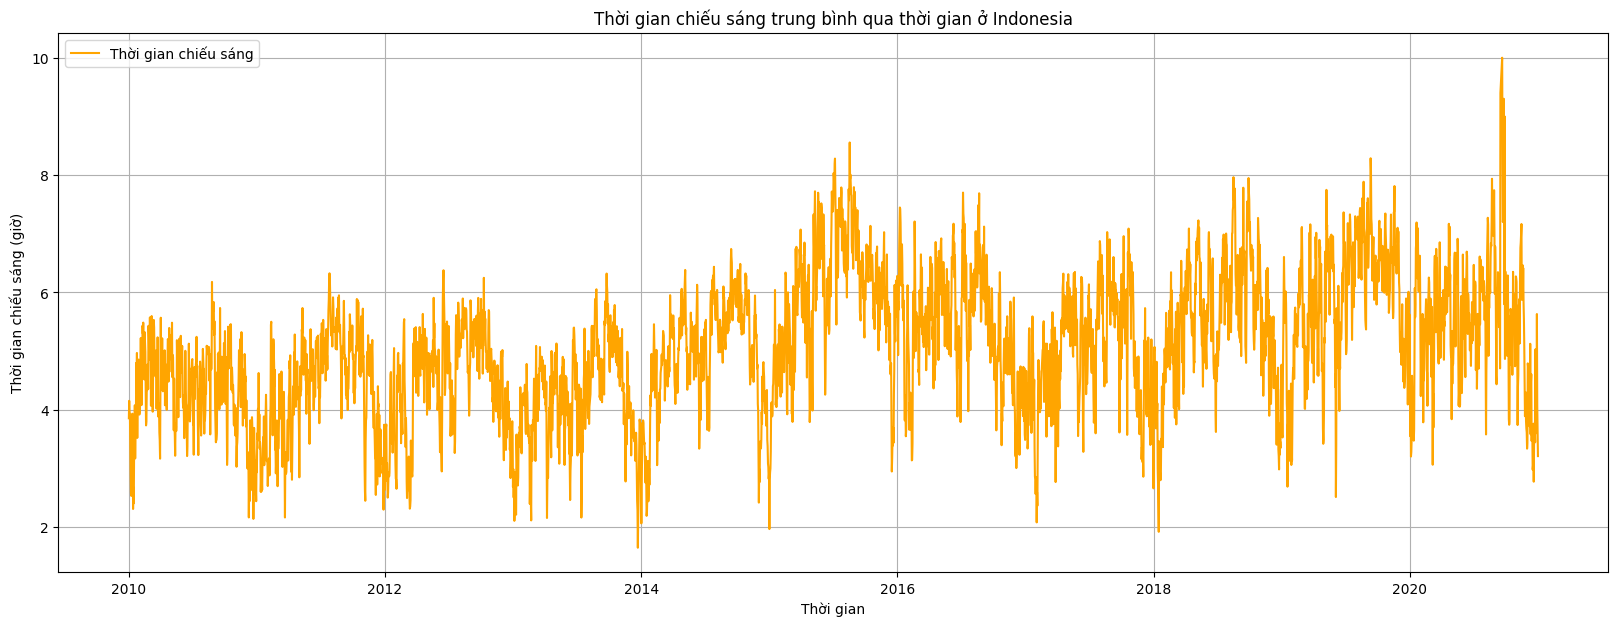

In [51]:
df_daily = df.groupby('date').agg({'ss': 'mean', 'Tavg': 'mean'}).reset_index()

plt.figure(figsize=(20, 7))
plt.plot(df_daily['date'], df_daily['ss'], color='orange', label='Thời gian chiếu sáng')
plt.title('Thời gian chiếu sáng trung bình qua thời gian ở Indonesia')
plt.xlabel('Thời gian')
plt.ylabel('Thời gian chiếu sáng (giờ)')
plt.grid(True)
plt.legend()
plt.show()

**Lý do chọn biểu đồ:**

- **Biểu đồ chuỗi thời gian**:
   - **Lý do chọn**: Biểu đồ chuỗi thời gian cho phép hiển thị sự biến đổi của thời gian chiếu sáng trung bình (ss) theo thời gian, từ đó có thể quan sát các xu hướng và biến động trong suốt giai đoạn từ 2010 đến 2020. Biểu đồ này giúp xác định rõ các thay đổi theo mùa hoặc các biến động bất thường trong lượng nắng.

**Lý do chọn màu sắc:**

- **Màu cam (Orange)**:
   - **Màu cam**: Được sử dụng cho thời gian chiếu sáng (ss) vì màu cam thường liên quan đến mặt trời và ánh sáng, tạo cảm giác tự nhiên và dễ nhận biết khi biểu diễn dữ liệu về ánh sáng.

**Nhận xét về đồ thị:**

- **Nhận xét tổng quan**:
   - Biểu đồ hiển thị đường biểu diễn của thời gian chiếu sáng trung bình hàng ngày (ss) từ năm 2010 đến năm 2020.
   - Sử dụng màu cam giúp biểu đồ rõ ràng và dễ phân biệt.

- **Nhận xét chi tiết**:
   - **Sự biến động**:
     - Thời gian chiếu sáng trung bình biến động khá lớn, với các đỉnh nhọn và các khoảng giảm rõ rệt. Điều này cho thấy sự thay đổi đáng kể trong thời gian chiếu sáng theo từng năm và theo mùa.
     - Các đỉnh cao nhất về thời gian chiếu sáng xuất hiện vào các thời điểm khác nhau trong suốt giai đoạn 2010-2020, nhưng có xu hướng xuất hiện nhiều hơn vào các mùa hè.
   - **Xu hướng dài hạn**:
     - Có sự gia tăng nhẹ trong thời gian chiếu sáng trung bình qua các năm, đặc biệt là sau năm 2015.
     - Xu hướng này có thể liên quan đến sự thay đổi khí hậu hoặc các yếu tố môi trường khác.
   - **Sự biến đổi theo mùa**:
     - Thời gian chiếu sáng có xu hướng tăng vào mùa hè và giảm vào mùa đông, điều này phù hợp với đặc điểm khí hậu tự nhiên.

**Đánh giá tình hình thời tiết dựa trên đồ thị:**

- **Tình hình chung**:
   - Biểu đồ cho thấy sự biến động lớn trong thời gian chiếu sáng trung bình hàng ngày qua các năm, với các đỉnh nhọn rõ rệt, đặc biệt vào các mùa hè.
   - Sự gia tăng lượng nắng trung bình có thể ảnh hưởng đến môi trường và các hoạt động kinh tế liên quan đến nắng.

- **Xu hướng khí hậu**:
   - Xu hướng gia tăng thời gian chiếu sáng trung bình có thể cho thấy sự thay đổi trong khí hậu, cần được quan tâm để có các biện pháp thích ứng phù hợp.
   - Sự biến đổi lớn theo mùa nhấn mạnh tầm quan trọng của việc lập kế hoạch và quản lý các hoạt động phụ thuộc vào thời gian chiếu sáng.

- Tiếp theo ta sẽ dùng seasonal_decompose để có cái nhìn tổng quan trước khi áp dụng machine learning model

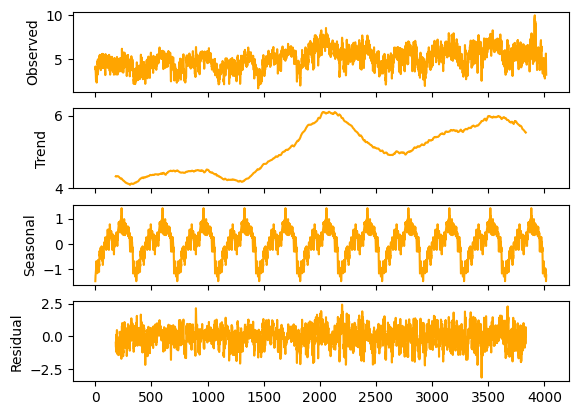

In [52]:
fig, axes = plt.subplots(4, 1, sharex=True)
result = seasonal_decompose(df_daily['ss'], model='additive', period=365)
result.observed.plot(ax=axes[0], legend=False, color='orange')
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1], legend=False, color='orange')
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2], legend=False, color='orange')
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3], legend=False, color='orange')
axes[3].set_ylabel('Residual')
plt.show()

#### Nhận xét về đồ thị:

**Thời gian chiếu sáng trung bình**:
- Biểu đồ đầu tiên hiển thị thời gian chiếu sáng trung bình (SS) theo thời gian từ năm 2010 đến 2020. Thời gian chiếu sáng có biến động khá lớn với các đỉnh và đáy rõ rệt, phản ánh sự thay đổi tự nhiên của khí hậu.

**Xu hướng (Trend)**:
- Biểu đồ thứ hai hiển thị xu hướng dài hạn của thời gian chiếu sáng. Xu hướng này cho thấy sự tăng giảm dần của lượng nắng qua các năm. Cụ thể, có một giai đoạn tăng từ khoảng năm 2012 đến 2017, sau đó xu hướng bắt đầu giảm nhẹ.

**Thời vụ (Seasonal)**:
- Biểu đồ thứ ba hiển thị các mẫu thời vụ, cho thấy sự lặp lại hàng năm của thời gian chiếu sáng. Mỗi năm đều có những giai đoạn tăng cao và giảm thấp, thường là vào các mùa nhất định, điều này phản ánh đặc điểm thời tiết theo mùa.

**Nhiễu (Resid)**:
- Biểu đồ cuối cùng hiển thị nhiễu (residuals), là phần còn lại sau khi đã loại bỏ xu hướng và thời vụ khỏi dữ liệu gốc. Nhiễu này không có mẫu rõ ràng, cho thấy rằng các biến động nhỏ lẻ không theo bất kỳ xu hướng hay mùa vụ nào.

**Đánh giá chung**:
- Sự phân tách này giúp chúng ta hiểu rõ hơn về các yếu tố ảnh hưởng đến thời gian chiếu sáng, bao gồm xu hướng dài hạn, mẫu thời vụ hàng năm và các biến động ngẫu nhiên. Từ đây ta có thể hiểu sâu hơn về bộ dữ liệu và bắt đầu áp dụng machine learning model vào để phân tích.

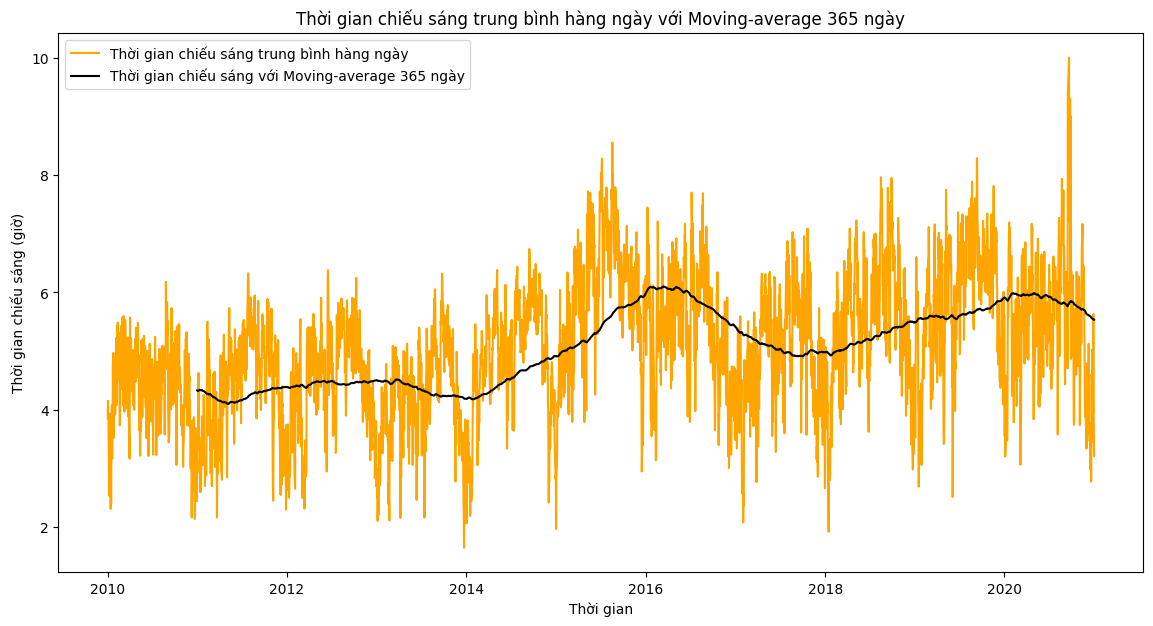

In [53]:
# Calculate moving average (window of 365 days)
df_daily['ss_MA'] = df_daily['ss'].rolling(window=365).mean()

plt.figure(figsize=(14, 7))
plt.plot(df_daily['date'], df_daily['ss'], color='orange', label='Thời gian chiếu sáng trung bình hàng ngày')
plt.plot(df_daily['date'], df_daily['ss_MA'], color='black', label='Thời gian chiếu sáng với Moving-average 365 ngày')
plt.xlabel('Thời gian')
plt.ylabel('Thời gian chiếu sáng (giờ)')
plt.title('Thời gian chiếu sáng trung bình hàng ngày với Moving-average 365 ngày')
plt.legend()
plt.show()

**Lý do chọn biểu đồ:**

- **Biểu đồ chuỗi thời gian (Time Series Plot)**:
  - **Lý do chọn**: Biểu đồ chuỗi thời gian cho phép hiển thị sự biến động của lượng nắng hàng ngày và Moving-average theo thời gian. Đây là cách tốt nhất để quan sát và phân tích xu hướng dài hạn, sự biến động theo mùa, và các dao động ngắn hạn của lượng nắng.

**Lý do chọn màu sắc:**

- **Màu cam (Orange)** và **Màu đen (Black)**:
  - **Màu cam (Orange)**: Được sử dụng cho lượng nắng trung bình hàng ngày vì màu cam liên quan đến ánh nắng, tạo cảm giác tự nhiên và dễ nhận biết.
  - **Màu đen (Black)**: Được sử dụng cho đường Moving-average 30 ngày vì nó tạo sự tương phản tốt với màu cam, giúp phân biệt rõ ràng giữa hai đường biểu diễn và dễ dàng quan sát xu hướng dài hạn.

**Nhận xét về đồ thị:**

- **Nhận xét tổng quan**:
  - Biểu đồ hiển thị hai đường biểu diễn: lượng nắng trung bình hàng ngày (màu cam) và trung bình động 365 ngày (màu đen) từ năm 2010 đến năm 2020.
  - Sử dụng đường Moving-average giúp làm mượt các dao động ngắn hạn và hiển thị rõ ràng xu hướng dài hạn của lượng nắng.

- **Nhận xét chi tiết**:
  Ở đây ta sẽ chủ yếu nhận xét đường Moving-average:
  - Sử dụng đường Moving-average giúp làm mượt các dao động ngắn hạn, giúp dễ dàng quan sát và phân tích xu hướng dài hạn mà không bị ảnh hưởng bởi các biến động nhỏ hàng ngày. Đây là công cụ hữu ích để nhận diện các mẫu dài hạn và xu hướng trong dữ liệu thời gian.
  - Đường Moving-average 365 ngày cho thấy lượng nắng có xu hướng tăng từ khoảng năm 2012 đến 2016, sau đó giảm nhẹ và lại tăng lên gần cuối giai đoạn 2020.

### Sử dụng Moving average để so sánh mối quan hệ giữa Thời gian chiếu sáng và Nhiệt độ trung bình

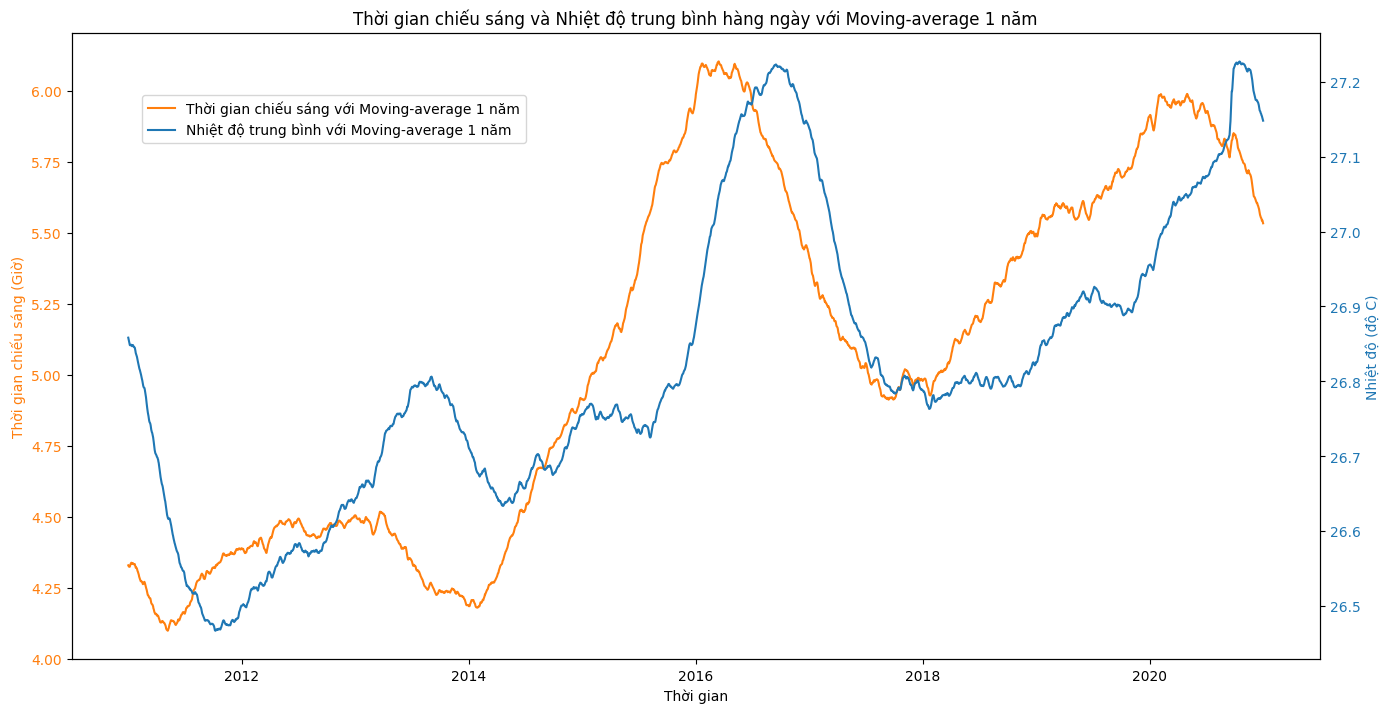

In [54]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Calculate moving averages
df_daily['Tavg_MA'] = df_daily['Tavg'].rolling(window=365).mean()

# Trục y thứ nhất
color = 'tab:orange'
ax1.set_xlabel('Thời gian')
ax1.set_ylabel('Thời gian chiếu sáng (Giờ)', color=color)
ax1.plot(df_daily['date'], df_daily['ss_MA'], label='Thời gian chiếu sáng với Moving-average 1 năm', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Trục y thứ hai
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Nhiệt độ (độ C)', color=color)
ax2.plot(df_daily['date'], df_daily['Tavg_MA'], label='Nhiệt độ trung bình với Moving-average 1 năm', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Thêm tiêu đề và hiển thị biểu đồ
fig.tight_layout()
plt.title('Thời gian chiếu sáng và Nhiệt độ trung bình hàng ngày với Moving-average 1 năm')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.show()

#### Lý do chọn biểu đồ:

- **Biểu đồ chuỗi thời gian với hai trục y (Dual Y-Axis Time Series Plot)**:
   - **Lý do chọn**: Biểu đồ chuỗi thời gian với hai trục y cho phép hiển thị đồng thời hai biến số có đơn vị đo lường khác nhau trên cùng một biểu đồ. Đây là cách tốt nhất để so sánh trực quan mối quan hệ giữa thời gian chiếu sáng và nhiệt độ trung bình theo thời gian. Biểu đồ này giúp xác định xem có sự tương quan nào giữa hai yếu tố này hay không.

#### Lý do chọn màu sắc:

- **Màu cam (Orange)** và **Màu xanh dương (Blue)**:
   - **Màu cam (Orange)**: Được sử dụng cho thời gian chiếu sáng vì màu cam thường liên quan đến ánh nắng và mặt trời, tạo cảm giác liên kết trực quan với yếu tố này.
   - **Màu xanh dương (Blue)**: Được sử dụng cho nhiệt độ trung bình vì màu xanh dương tạo sự tương phản tốt với màu cam, giúp phân biệt rõ ràng giữa hai biến số.

#### Nhận xét về đồ thị:

- **Nhận xét tổng quan**:
   - Biểu đồ hiển thị hai đường biểu diễn: thời gian chiếu sáng và nhiệt độ trung bình từ năm 2010 đến năm 2020.
   - Sử dụng hai trục y giúp so sánh trực quan giữa hai biến số có đơn vị đo lường khác nhau mà không làm mất đi tính chính xác của dữ liệu.

- **Nhận xét chi tiết**:
   - **Sự biến động**:
     - Thời gian chiếu sáng biến động quanh giá trị trung bình với các đỉnh nhọn xuất hiện vào các thời điểm khác nhau trong suốt giai đoạn 2010-2020.
     - Nhiệt độ trung bình cũng có sự biến động tương tự, với các đỉnh nhọn thường xuất hiện đồng thời với các đỉnh nhọn của thời gian chiếu sáng.
   - **Xu hướng dài hạn**:
     - Cả thời gian chiếu sáng và nhiệt độ trung bình đều có xu hướng tăng qua các năm, cho thấy sự gia tăng của hai yếu tố này trong thời gian dài.
   - **Mối quan hệ giữa thời gian chiếu sáng và nhiệt độ trung bình**:
     - Có một mối quan hệ tích cực rõ ràng giữa thời gian chiếu sáng và nhiệt độ trung bình. Các đỉnh nhọn của thời gian chiếu sáng thường trùng với các đỉnh nhọn của nhiệt độ trung bình, cho thấy rằng khi thời gian chiếu sáng tăng, nhiệt độ trung bình cũng tăng.
     - Việc sử dụng đường Moving average cho cả 2 biến số đã giúp ta thấy được xu thế rõ ràng của thời gian chiếu sáng và nhiệt độ trung bình. Từ đó mà ta có thể đưa ra được dự đoán của một yếu tố dựa trên yếu tố còn lại.

### Sử dụng Moving average để so sánh mối quan hệ giữa Thời gian chiếu sáng và Lượng mưa

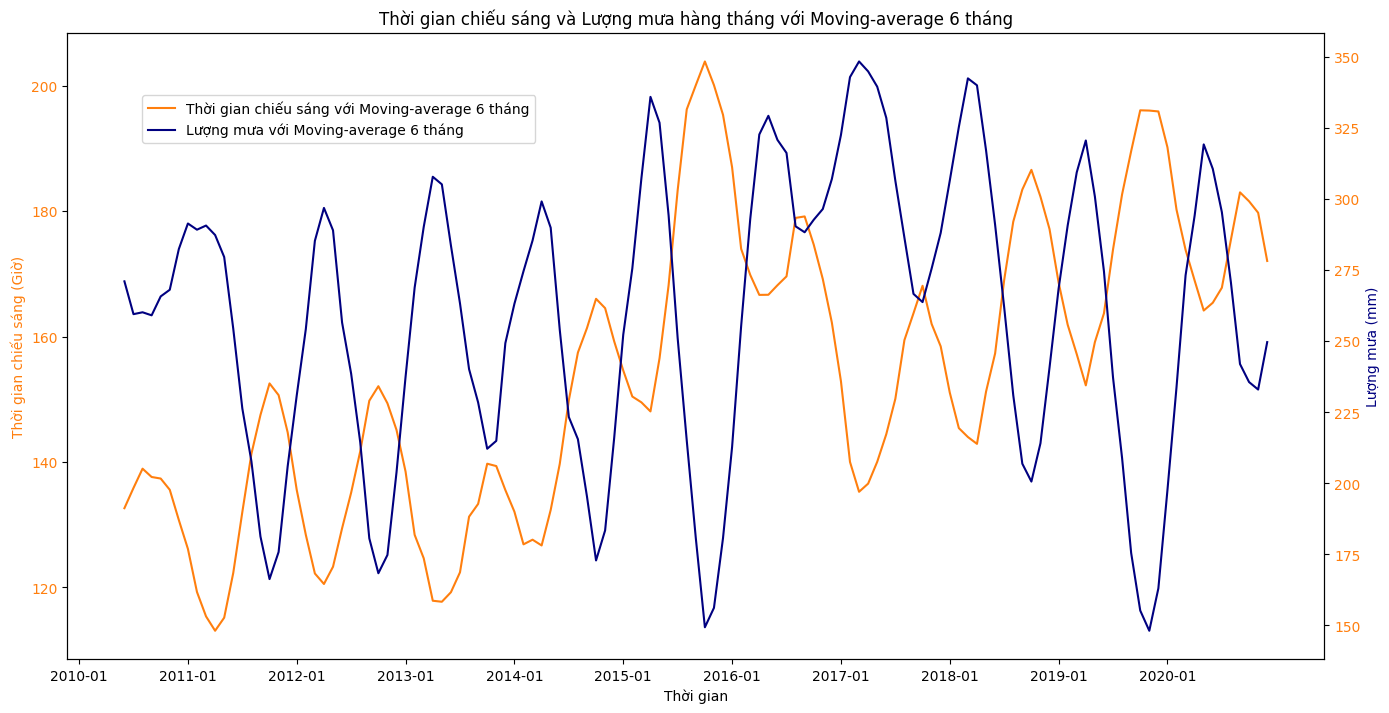

In [58]:
fig, ax1 = plt.subplots(figsize=(14, 7))

# Resample to monthly data
df_monthly = df.groupby('date').agg({'ss': 'mean', 'RR': 'mean'}).reset_index().resample('M', on='date').sum()
df_monthly['month'] = df_monthly.index.strftime('%Y-%m')

# Calculate moving averages
df_monthly['ss_MA'] = df_monthly['ss'].rolling(window=6).mean()
df_monthly['RR_MA'] = df_monthly['RR'].rolling(window=6).mean()

# Trục y thứ nhất
color = 'tab:orange'
ax1.set_xlabel('Thời gian')
ax1.set_ylabel('Thời gian chiếu sáng (Giờ)', color=color)
ax1.plot(df_monthly['month'], df_monthly['ss_MA'], color=color, label='Thời gian chiếu sáng với Moving-average 6 tháng')
ax1.tick_params(axis='y', labelcolor=color)

# Trục y thứ hai
ax2 = ax1.twinx()
ax2.set_ylabel('Lượng mưa (mm)', color='navy')
ax2.plot(df_monthly['month'], df_monthly['RR_MA'], label='Lượng mưa với Moving-average 6 tháng', color='navy')
ax2.tick_params(axis='y', labelcolor=color)

# Thêm tiêu đề và hiển thị biểu đồ
fig.tight_layout()
plt.title('Thời gian chiếu sáng và Lượng mưa hàng tháng với Moving-average 6 tháng')
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.xticks(range(0, len(df_monthly['month']), 12), df_monthly['month'][::12], rotation=45)
plt.show()

#### Lý do chọn biểu đồ:

- **Biểu đồ chuỗi thời gian với hai trục y (Dual Y-Axis Time Series Plot)**:
   - **Lý do chọn**: Biểu đồ chuỗi thời gian với hai trục y cho phép hiển thị đồng thời hai biến số có đơn vị đo lường khác nhau trên cùng một biểu đồ. Đây là cách tốt nhất để so sánh trực quan mối quan hệ giữa thời gian chiếu sáng và lượng mưa theo thời gian. Điều này giúp người quan sát dễ dàng nhận thấy các xu hướng và mối quan hệ giữa hai yếu tố này.

#### Lý do chọn màu sắc:

- **Màu cam (Orange)** và **Màu xanh đậm (Navy)**:
   - **Màu cam (Orange)**: Được sử dụng cho thời gian chiếu sáng vì màu cam thường liên quan đến ánh nắng và mặt trời, tạo cảm giác liên kết trực quan với yếu tố này.
   - **Màu xanh đậm (Navy)**: Được sử dụng cho lượng mưa vì màu xanh đậm tạo sự tương phản tốt với màu cam, giúp phân biệt rõ ràng giữa hai biến số.

#### Nhận xét về đồ thị:

- **Nhận xét tổng quan**:
   - Biểu đồ hiển thị hai đường biểu diễn: thời gian chiếu sáng và lượng mưa hàng tháng từ năm 2010 đến năm 2020.
   - Sử dụng hai trục y giúp so sánh trực quan giữa hai biến số có đơn vị đo lường khác nhau mà không làm mất đi tính chính xác của dữ liệu.

- **Nhận xét chi tiết**:

   - **Sự biến động**:
      - Thời gian chiếu sáng và lượng mưa đều có sự biến động theo thời gian với các đỉnh và đáy rõ ràng.
      - Có xu hướng mùa vụ trong cả thời gian chiếu sáng và lượng mưa, với các đỉnh cao nhất thường xuất hiện vào các khoảng thời gian nhất định trong năm.

   - **Mối quan hệ giữa thời gian chiếu sáng và lượng mưa**:
      - Quan sát từ biểu đồ cho thấy rằng có sự khác biệt rõ ràng giữa các đỉnh của thời gian chiếu sáng và lượng mưa. Khi lượng mưa tăng cao, thời gian chiếu sáng có xu hướng giảm và ngược lại.
      - Điều này có thể được giải thích bởi hiện tượng mưa làm giảm thời gian chiếu sáng hoặc ngược lại, thời gian chiếu sáng giảm dẫn đến tăng lượng mưa do sự thay đổi trong điều kiện thời tiết.

### Sử dụng ARIMA model để dự đoán thời gian chiếu sáng trong 1 năm tới

- Mô hình ARIMA được sử dụng rộng rãi do khả năng xử lý tốt các chuỗi thời gian có xu hướng và mùa vụ, làm cho nó trở thành công cụ mạnh mẽ trong dự đoán thời gian và phân tích chuỗi thời gian.
- Đầu tiên ta sẽ thử nghiệm model trên tập dữ liệu, chia ra làm tập train (2/3) và tập test (1/3).

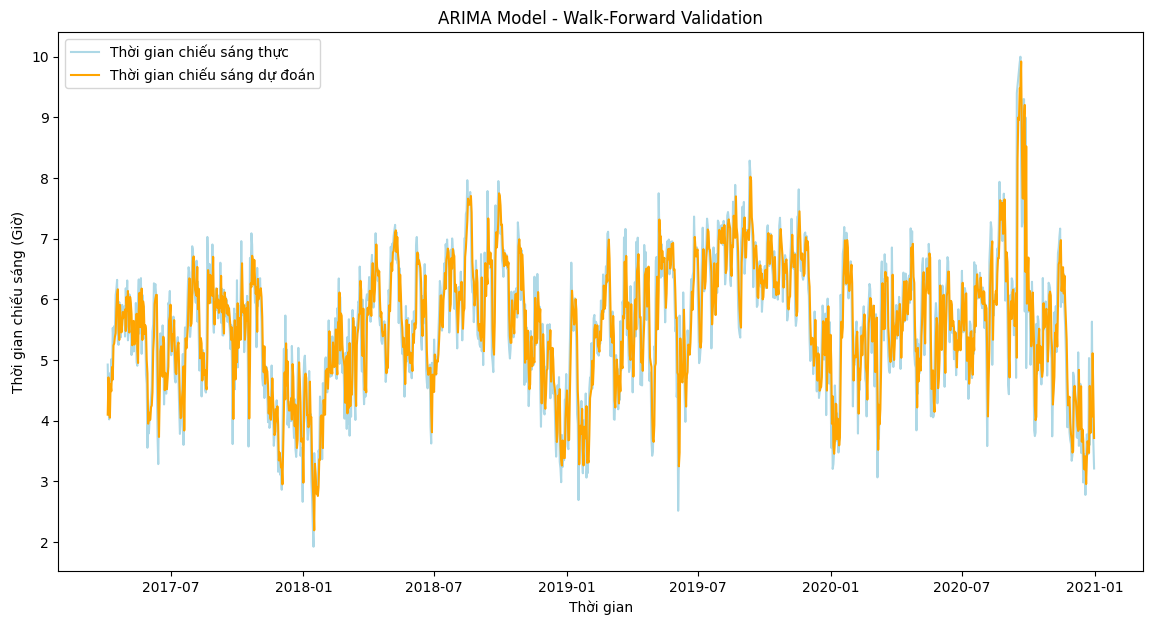

In [56]:
# Prepare data
df_copy = df_daily.set_index('date')

size = int(len(df_copy) * 0.66)
train, test = df_copy.iloc[0:size], df_copy.iloc[size:len(df_copy)]

history = [x for x in train['ss']]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test['ss'].iloc[t]
    history.append(obs)
    
plt.figure(figsize=(14, 7))
plt.plot(test.index, test['ss'], label='Thời gian chiếu sáng thực', color='lightblue')
plt.plot(test.index, predictions, label='Thời gian chiếu sáng dự đoán', color='orange')
plt.xlabel('Thời gian')
plt.ylabel('Thời gian chiếu sáng (Giờ)')
plt.title('ARIMA Model - Walk-Forward Validation')
plt.legend()
plt.show()

#### Biểu đồ ARIMA Model - Walk-Forward Validation (test)

**Lý do chọn biểu đồ:**
Biểu đồ chuỗi thời gian là công cụ hiệu quả để so sánh giữa dữ liệu thực tế và dự đoán của mô hình. Nó giúp trực quan hóa độ chính xác của mô hình dự đoán theo thời gian.

**Lý do chọn màu sắc:**
- Màu xanh nhạt (light blue) cho dữ liệu thực tế để dễ nhận diện và nổi bật trên nền trắng.
- Màu cam (orange) cho dữ liệu dự đoán để tạo sự phân biệt rõ ràng với dữ liệu thực tế.

**Nhận xét về đồ thị:**
- Mô hình ARIMA (AutoRegressive Integrated Moving Average) là một trong những mô hình phổ biến trong phân tích chuỗi thời gian. Nó kết hợp ba thành phần: tự hồi quy (AR), tích hợp (I), và trung bình trượt (MA) để dự đoán các giá trị tương lai dựa trên dữ liệu quá khứ.
- **Độ khớp giữa dự đoán và thực tế:**
  - Biểu đồ cho thấy mô hình ARIMA (màu cam) dự đoán khá sát với dữ liệu thực tế (màu xanh nhạt) trong giai đoạn từ 2017 đến 2021.
  - Các dao động của đường dự đoán tương tự như đường thực tế, đặc biệt là trong các chu kỳ mùa vụ rõ ràng.
  - Tuy nhiên, có một số giai đoạn mà dự đoán không khớp hoàn toàn với thực tế, ví dụ như vào các tháng cao điểm chiếu sáng hoặc các tháng có sự biến động lớn.

- **Tính hiệu quả của mô hình:**
  - ARIMA tỏ ra khá hiệu quả trong việc dự đoán các chu kỳ dài hạn và xu hướng tổng quát của thời gian chiếu sáng.
  - Mặc dù vậy, mô hình có thể không dự đoán chính xác các biến động ngắn hạn hoặc các giá trị bất thường, do các sai số dự đoán tích lũy qua thời gian.

- Sau khi đã thử nghiệm trên tập dữ liệu, ta thấy mô hình ARIMA khá ổn định, tiếp theo ta sẽ dự đoán thời gian chiếu sáng cho 1 năm tới

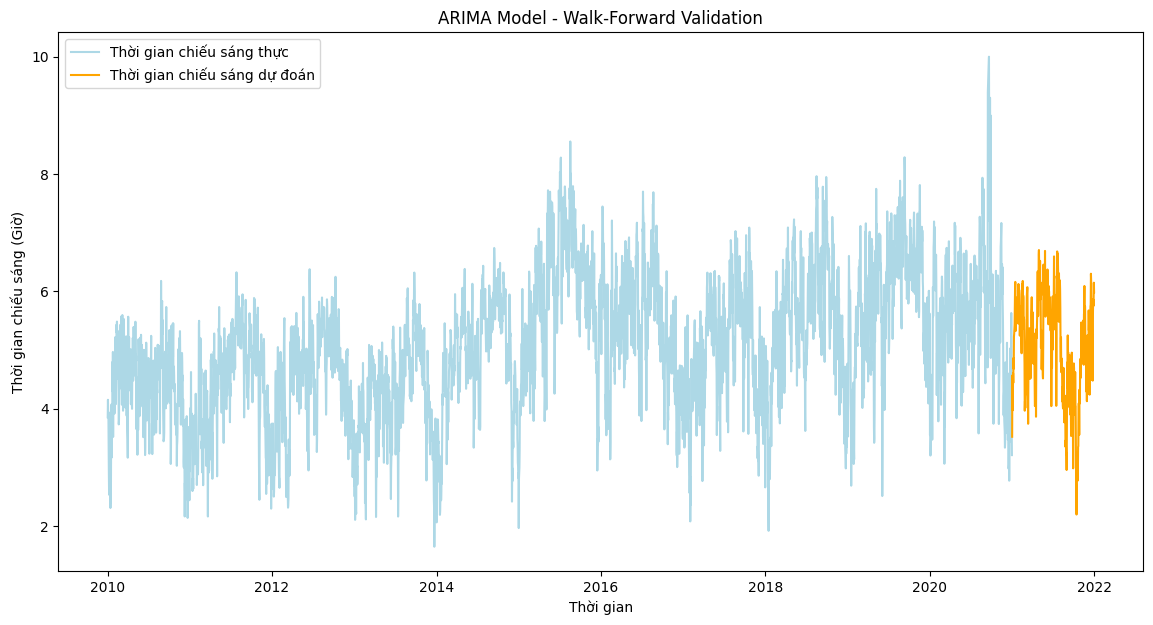

In [57]:
# Prepare data
df_copy = df_daily.set_index('date')

history = [x for x in df_copy['ss']]
predictions = list()

# walk-forward validation
for t in range(365):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test['ss'].iloc[t]
    history.append(obs)

start_date = pd.to_datetime('2021-01-01')
end_date = pd.to_datetime('2021-12-31')

forecast_days = (end_date - start_date).days + 1
forecast_index = pd.date_range(start=start_date, periods=forecast_days, freq='D')

plt.figure(figsize=(14, 7))
plt.plot(df_copy.index, df_copy['ss'], color='lightblue', label='Thời gian chiếu sáng thực')
plt.plot(forecast_index, predictions, label='Thời gian chiếu sáng dự đoán', color='orange')
plt.xlabel('Thời gian')
plt.ylabel('Thời gian chiếu sáng (Giờ)')
plt.title('ARIMA Model - Walk-Forward Validation')
plt.legend()
plt.show()


#### Biểu đồ ARIMA Model - Walk-Forward Validation (predict in 1 year)

**Lý do chọn biểu đồ:**
Tương tự như biểu đồ trước, biểu đồ này giúp so sánh giữa dữ liệu thực tế và dự đoán của mô hình ARIMA nhưng trong một khoảng thời gian dài hơn, giúp đánh giá hiệu suất của mô hình trong dự đoán dài hạn.

**Lý do chọn màu sắc:**
- Màu xanh nhạt (light blue) cho dữ liệu thực tế để duy trì tính nhất quán.
- Màu cam (orange) cho dữ liệu dự đoán để tạo sự phân biệt rõ ràng với dữ liệu thực tế.

**Nhận xét về đồ thị:**
- **Độ khớp giữa dự đoán và thực tế:**
  - Đường màu cam (dự đoán) tiếp tục theo xu hướng của đường màu xanh nhạt (thực tế) cho thấy mô hình ARIMA có khả năng dự đoán tốt trong một khoảng thời gian dài hơn.
  - Các dao động của thời gian chiếu sáng được mô hình dự đoán khá tốt, đặc biệt là các chu kỳ mùa vụ.

- **Dự đoán trong dài hạn:**
  - Mô hình ARIMA dường như dự đoán khá chính xác xu hướng và chu kỳ thời gian chiếu sáng trong năm 2021.
  - Tuy nhiên, như đã đề cập trước đó, mô hình có thể gặp khó khăn trong việc dự đoán các biến động ngắn hạn hoặc các giá trị cực trị, điều này có thể thấy rõ trong một số đỉnh hoặc đáy của dữ liệu dự đoán.

- **Hiệu suất tổng thể:**
  - Tổng thể, mô hình ARIMA thể hiện khả năng dự đoán tốt các xu hướng dài hạn và chu kỳ mùa vụ, làm cho nó hữu ích trong việc dự đoán các yếu tố thời gian chiếu sáng cho các ứng dụng nông nghiệp và quản lý tài nguyên.
  - Tuy nhiên, để cải thiện độ chính xác trong dự đoán ngắn hạn và các biến động bất thường, có thể cần kết hợp thêm các yếu tố khác hoặc sử dụng các mô hình dự đoán bổ sung như SARIMA (Seasonal ARIMA) hoặc các kỹ thuật học máy khác.



### Kết luận về mô hình ARIMA trong dự đoán thời gian chiếu sáng
- **Ưu điểm:**
  - Khả năng nắm bắt các xu hướng dài hạn và chu kỳ mùa vụ tốt.
  - Dễ dàng áp dụng và triển khai cho các chuỗi thời gian có đặc tính tương tự.

- **Nhược điểm:**
  - Khó khăn trong việc dự đoán các biến động ngắn hạn hoặc các giá trị bất thường.
  - Cần có sự điều chỉnh và tối ưu hóa để đạt được kết quả tốt nhất.